## Analysis of Rgl3 signaling network in the developing dopaminergic niche (mouse)

Luca Fusar Bassini

In [1]:
library(Seurat)
library(dplyr) 
library(Matrix)
library(ggplot2)
library(repr)

options(repr.plot.width=20, repr.plot.height=15)
options(Seurat.object.assay.version = "v5")

Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


1 - Setting up the Seurat object with cell type annotations

In [3]:
# inputting the raw counts from La Manno et al. 2016 
# REF: https://doi.org/10.1016/j.cell.2016.09.027

data = read.table("counts_mouse.txt", sep="\t", header=TRUE)

# some basic data manipulations
data[is.na(data)] = 0
rn = data$X
data = data[, 2:ncol(data)]
rownames(data) = rn

detect_non_numeric <- function(df) {
  non_numeric_locations <- lapply(df, function(col) {
    if(any(!is.numeric(col))) {
      return(which(!is.numeric(col)))
    }
  })
  non_numeric_locations <- non_numeric_locations[sapply(non_numeric_locations, length) > 0]
  return(non_numeric_locations)
}
non_numeric_locations <- detect_non_numeric(data)
print(non_numeric_locations)

# creating a Seurat object from the raw counts
so <- CreateSeuratObject(counts=Matrix::Matrix(as.matrix(data),sparse = T), assay="RNA")

# the data was already cleaned so I won't do any preprocessing here

# inspecting the Seurat object
so

# default Seurat pipeline: normalization, variable features detection, scaling, dimensionality reduction (and clustering, but this is not used dowstream)
so = NormalizeData(so)
so <- FindVariableFeatures(so)
DefaultAssay(so) = "RNA"
so <- ScaleData(so, verbose = TRUE)
so <- RunPCA(so, npcs = 30, verbose = TRUE)
so <- RunUMAP(so, reduction = "pca", dims = 1:30)
so <- FindNeighbors(so, reduction = "pca", dims = 1:30, k.param=100, annoy.metric='cosine')
so <- FindClusters(so, resolution = 4, algorithm = 1, method='matrix', verbose=TRUE)

# saving to file
saveRDS(so, file="so_mouse_emilia.rds")

named list()


Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


An object of class Seurat 
16710 features across 1907 samples within 1 assay 
Active assay: RNA (16710 features, 0 variable features)
 1 layer present: counts

Normalizing layer: counts

Warning message:
"The following arguments are not used: layer"
Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  Stmn2, Stmn3, Gap43, Rtn1, Mllt11, Tubb2a, Meg3, Gm6682, Snhg11, Snap25 
	   Resp18, Serpini1, Atp1a3, Tmem130, Gabrg2, Syt4, Sox11, Tenm2, Dner, Elavl2 
	   Atp1b1, Ndrg4, Miat, Ntm, AW551984, Snca, Atp5g1, Rnf152, Slc8a1, Scg2 
Negative:  Sparc, Esam, Itm2a, Cd34, Slc2a1, Epas1, Col4a1, Anxa2, Igfbp7, Cldn5 
	   Gng11, Cd93, Col4a2, Tagln2, Kdr, B2m, Eltd1, Apold1, Ets1, Sepp1 
	   Egfl7, AU021092, Anxa3, Ptprb, Nid1, Gimap6, Ppic, Pecam1, Fn1, BC028528 
PC_ 2 
Positive:  Phgdh, Cenpf, Top2a, Ccnb1, Hmgb2, Fabp7, Cks2, Prc1, Nusap1, Ube2c 
	   Birc5, Spc25, Pbk, Cdca8, Cdk1, Wls, Aurka, Cenpe, Fam64a, Cdca3 
	   Hes5, Sgol1, Fgfr3, 2810417H13Rik, Rfx4, Tpx2, Ect2, Ckap2, Mdk, Hmmr 
Negative:  Stmn2, Tmsb10, Gap43, Stmn3, Mllt11, Rtn1, Snhg11, Meg3, Eltd1, Ablim1 
	   Cldn5, Vwa1, Slc6a6, Sptbn1, Cd93

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1907
Number of edges: 251500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4013
Number of communities: 17
Elapsed time: 0 seconds


1 singletons identified. 16 final clusters.



In [4]:
# reimport the Seurat object from the previous step if needed

so = readRDS("so_mouse_emilia.rds")

so

An object of class Seurat 
16710 features across 1907 samples within 1 assay 
Active assay: RNA (16710 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [6]:
# importing the metadata from La Manno et al. 2016
meta = read.table("metadata_mouse.txt")
meta

X1772094_169_G10 X1772072_247_E09 X1772094_174_H05
Cell_ID         1772094_169_G10  1772072_247_E09  1772094_174_H05 
Cell_type       mPeric           mPeric           mPeric          
Timepoint       E12.5            E18.5            E14.5           
Total_Molecules 7874             3701             2878            
                X1772094_172_F07 X1771013_117_F06 X1771013_111_H03
Cell_ID         1772094_172_F07  1771013_117_F06  1771013_111_H03 
Cell_type       mPeric           mPeric           mPeric          
Timepoint       E14.5            E14.5            E11.5           
Total_Molecules 7346             3003             3364            
                X1772094_146_G12 X1772094_166_C10 X1772094_146_G09
Cell_ID         1772094_146_G12  1772094_166_C10  1772094_146_G09 
Cell_type       mPeric           mPeric           mPeric          
Timepoint       E11.5            E12.5            E11.5           
Total_Molecules 8376             5953             10940           
                X1772094_169_H05 ... X1772072_246_F12 X1772072_246_B06
Cell_ID         1772094_169_H05  ... 1772072_246_F12  1772072_246_B06 
Cell_type       mPeric           ... mUnk             mUnk            
Timepoint       E12.5            ... E18.5            E18.5           
Total_Molecules 7380             ... 10267            15825           
                X1772072_246_H06 X1772072_246_D06 X1772072_246_E11
Cell_ID         1772072_246_H06  1772072_246_D06  1772072_246_E11 
Cell_type       mUnk             mUnk             mUnk            
Timepoint       E18.5            E18.5            E18.5           
Total_Molecules 12332            12374            16490           
                X1772072_246_D04 X1772072_246_A12 X1772066_085_C01
Cell_ID         1772072_246_D04  1772072_246_A12  1772066_085_C01 
Cell_type       mUnk             mUnk             mUnk            
Timepoint       E18.5            E18.5            E15.5           
Total_Molecules 19441            16205            20848           
                X1772075_300_C03 X1772094_166_F05
Cell_ID         1772075_300_C03  1772094_166_F05 
Cell_type       mUnk             mUnk            
Timepoint       E15.5            E12.5           
Total_Molecules 10502            14571

In [7]:
# aggregating cell types

meta = data.frame(t(meta))

meta <- meta %>%
  mutate(Cell_type = case_when(
    grepl("^mNbML", Cell_type) ~ "mNbML",
    grepl("^mGaba", Cell_type) ~ "mGaba",
    grepl("^mNbL", Cell_type) ~ "mNbL",
    TRUE ~ Cell_type
  ))

meta = data.frame(t(meta))

meta

X1772094_169_G10 X1772072_247_E09 X1772094_174_H05
Cell_ID         1772094_169_G10  1772072_247_E09  1772094_174_H05 
Cell_type       mPeric           mPeric           mPeric          
Timepoint       E12.5            E18.5            E14.5           
Total_Molecules 7874             3701             2878            
                X1772094_172_F07 X1771013_117_F06 X1771013_111_H03
Cell_ID         1772094_172_F07  1771013_117_F06  1771013_111_H03 
Cell_type       mPeric           mPeric           mPeric          
Timepoint       E14.5            E14.5            E11.5           
Total_Molecules 7346             3003             3364            
                X1772094_146_G12 X1772094_166_C10 X1772094_146_G09
Cell_ID         1772094_146_G12  1772094_166_C10  1772094_146_G09 
Cell_type       mPeric           mPeric           mPeric          
Timepoint       E11.5            E12.5            E11.5           
Total_Molecules 8376             5953             10940           
                X1772094_169_H05 ... X1772072_246_F12 X1772072_246_B06
Cell_ID         1772094_169_H05  ... 1772072_246_F12  1772072_246_B06 
Cell_type       mPeric           ... mUnk             mUnk            
Timepoint       E12.5            ... E18.5            E18.5           
Total_Molecules 7380             ... 10267            15825           
                X1772072_246_H06 X1772072_246_D06 X1772072_246_E11
Cell_ID         1772072_246_H06  1772072_246_D06  1772072_246_E11 
Cell_type       mUnk             mUnk             mUnk            
Timepoint       E18.5            E18.5            E18.5           
Total_Molecules 12332            12374            16490           
                X1772072_246_D04 X1772072_246_A12 X1772066_085_C01
Cell_ID         1772072_246_D04  1772072_246_A12  1772066_085_C01 
Cell_type       mUnk             mUnk             mUnk            
Timepoint       E18.5            E18.5            E15.5           
Total_Molecules 19441            16205            20848           
                X1772075_300_C03 X1772094_166_F05
Cell_ID         1772075_300_C03  1772094_166_F05 
Cell_type       mUnk             mUnk            
Timepoint       E15.5            E12.5           
Total_Molecules 10502            14571

In [8]:
# checking the diversity of embryonic days the cells come from, which we'll have to aggregate to have statistical mass, but should not be forgotten as these cells are changing in time
table(unlist(meta[3,]))

# importing the cell types from La Manno et al. 2016 into the Seurat object
df = data.frame(t(rbind(colnames(meta), meta[2,])))
colnames(df) = c("cell", "celltype")
so = AddMetaData(object = so, metadata = df, col.name = "celltype")

# visually checking the consistency between the Seurat object dimensionality reduction and the cell type annotations from the paper
Idents(so) <- 'celltype'
so = subset(so, idents = setdiff(unique(as.character(Idents(so))), c("mUnk", "mEndo"))) # removing the cells whose cell type annotation was unknown ("Unk")
Idents(so) <- 'celltype'
DimPlot(so, reduction = 'umap', label = TRUE)


E11.5 E12.5 E13.5 E14.5 E15.5 E18.5 
  406   350   345   308   356   142 

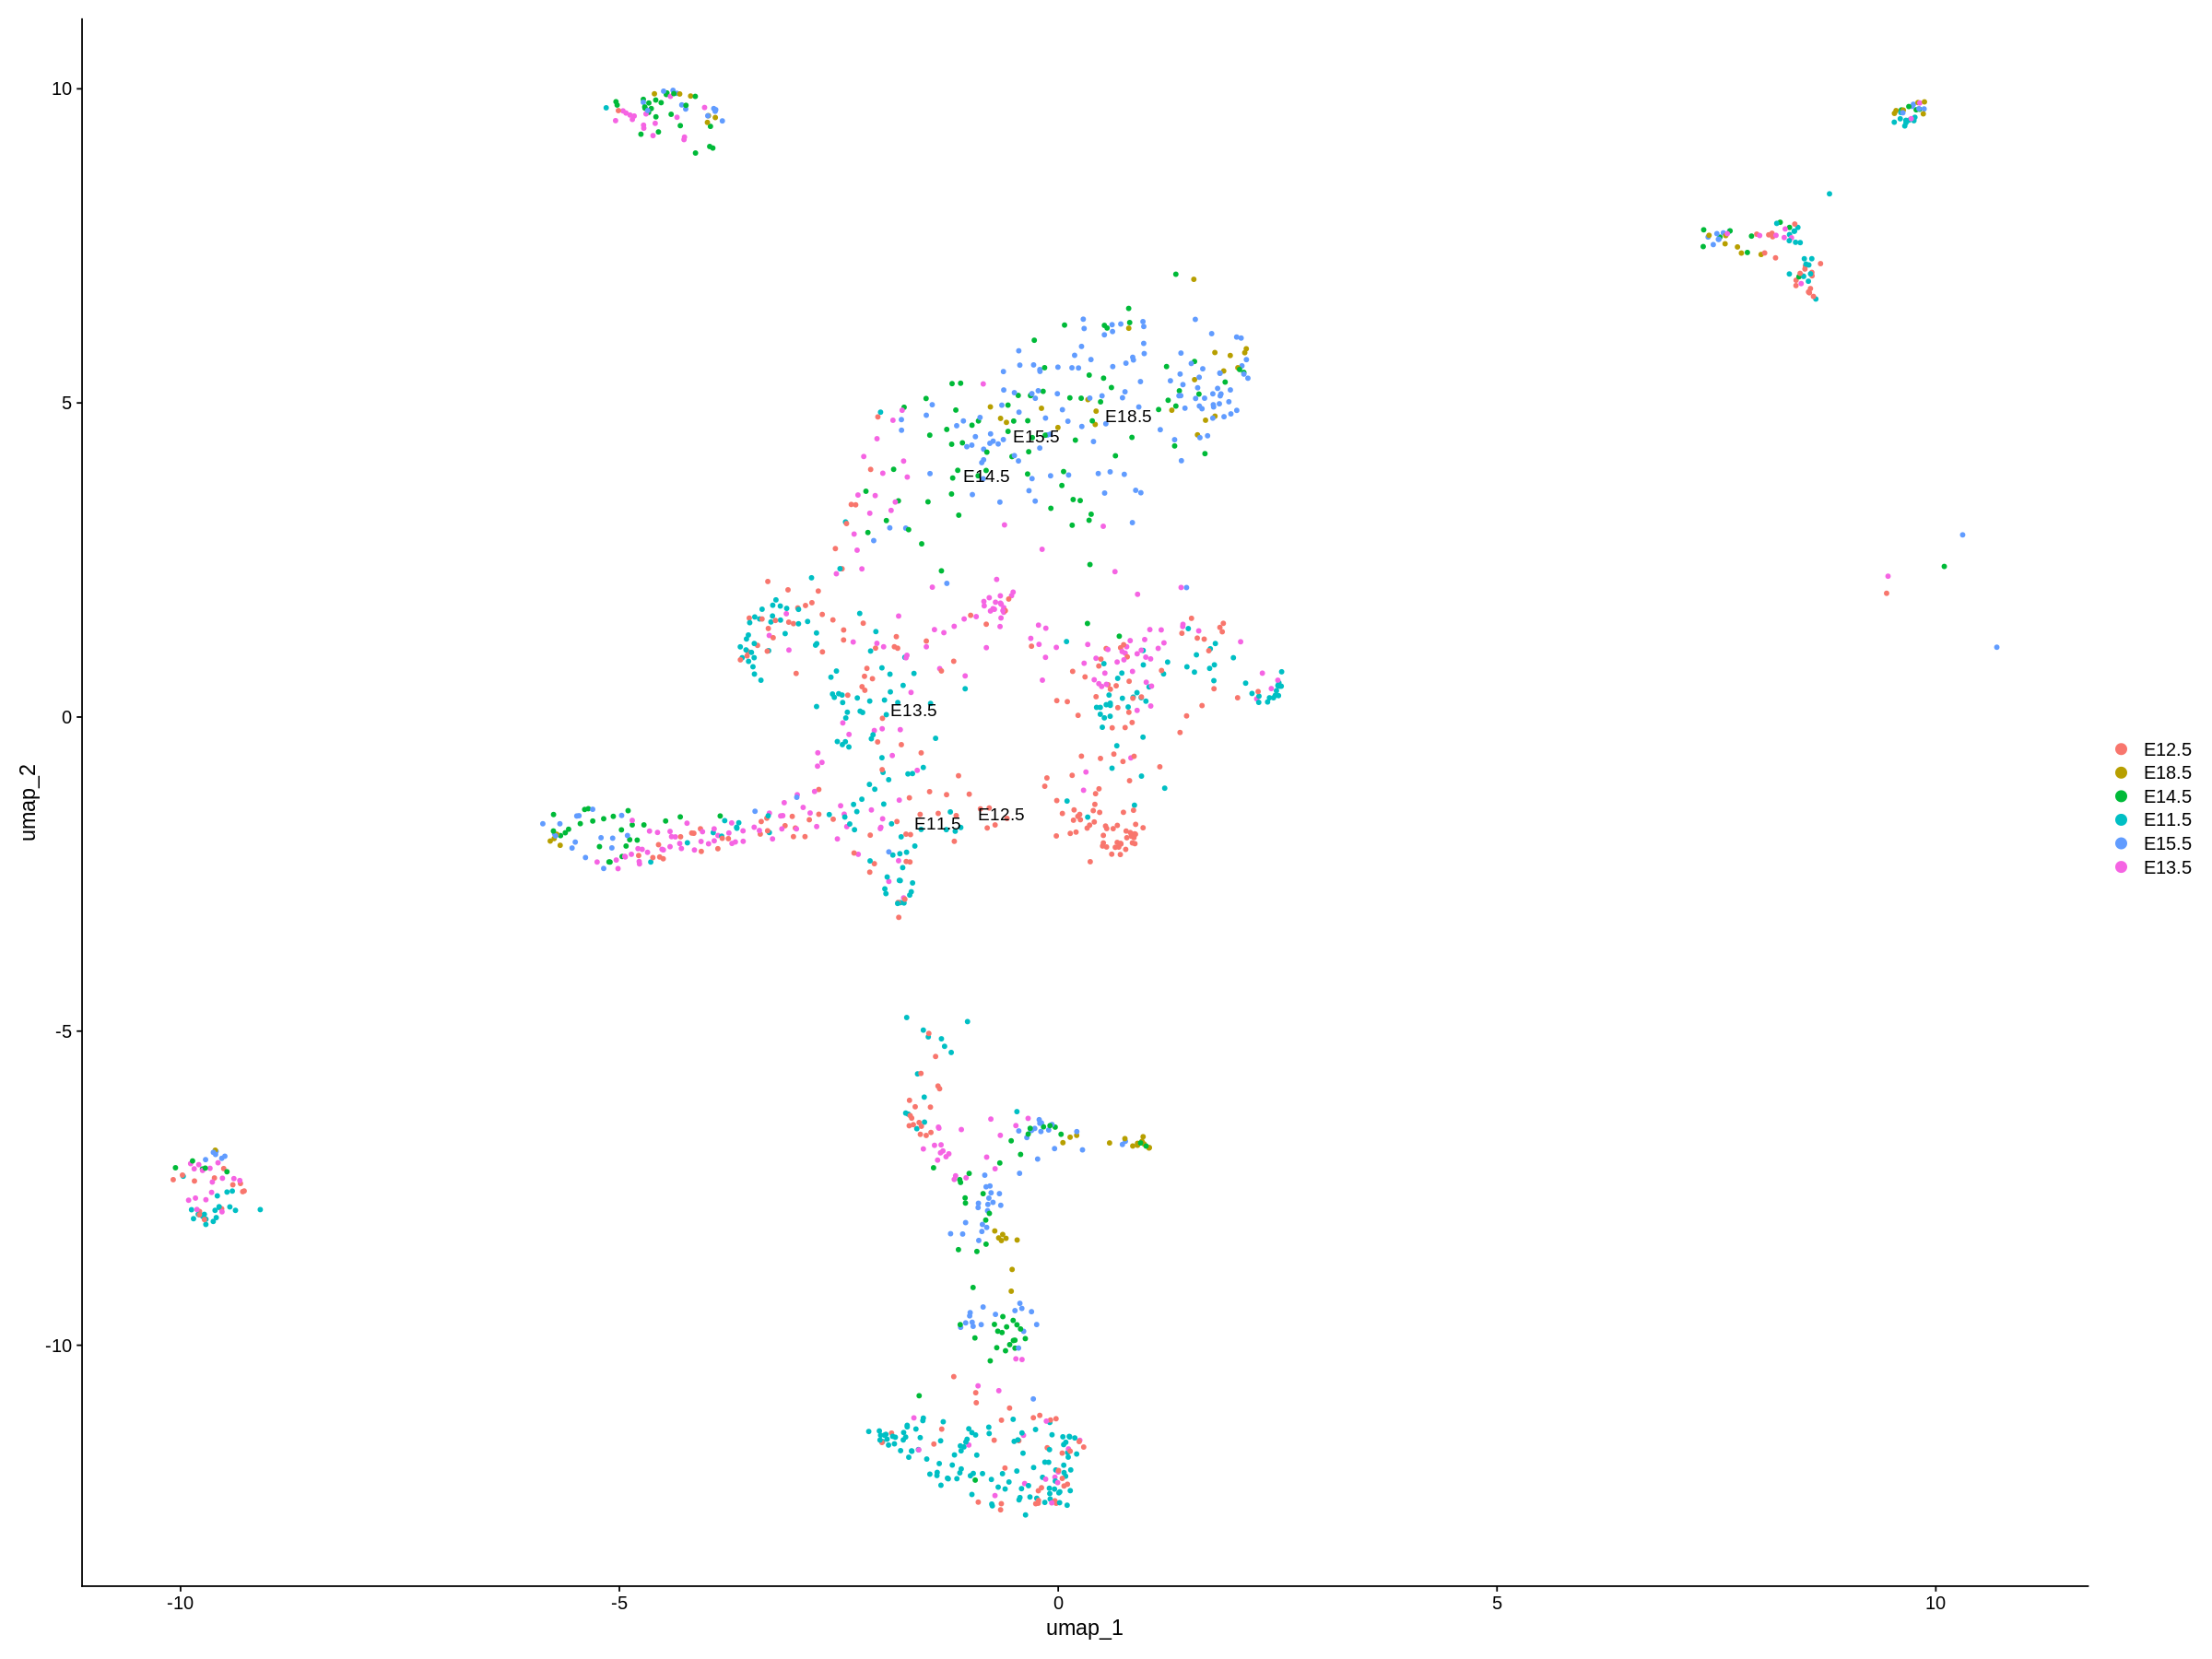

In [10]:
# coloring by embryonic day
df = data.frame(t(rbind(colnames(meta), meta[3,])))
colnames(df) = c("cell", "age")
so = AddMetaData(object = so, metadata = df, col.name = "age")

Idents(so) <- 'age'
so = subset(so, idents = unique(as.character(Idents(so)))) # removing the cells whose cell type annotation was unknown ("Unk")
DimPlot(so, reduction = 'umap', label = TRUE)

In [11]:
# plotting to file

library(Seurat)
library(ggplot2)
library(patchwork)

Idents(so) <- 'celltype'
p1 <- DimPlot(so, reduction = 'umap', label = TRUE, pt.size = 3, label.size = 9) + 
      theme_void() + 
      scale_size(range = c(3, 3)) +
      theme(
        text = element_text(size = 10)
      )

Idents(so) <- 'age'
p2 <- DimPlot(so, reduction = 'umap', label = TRUE, pt.size = 3, label.size = 9) + 
      theme_void() + 
      scale_size(range = c(3, 3)) +
      theme(
        text = element_text(size = 10)
      )

pdf("m_age.pdf", width = 20, height = 18)
p1+p2
dev.off()

png 
  2

In [12]:
# same but focusing on Rgl1

Idents(so) <- 'celltype'
rgl1 = subset(so, idents="mRgl1")

library(ggplot2)
library(patchwork)

Idents(rgl1) <- 'celltype'
p1 <- DimPlot(rgl1, reduction = 'umap', label = TRUE, pt.size = 4, label.size = 12) + 
      theme_void() + 
      scale_size(range = c(3, 3)) +
      theme(
        text = element_text(size = 10)
      )

Idents(rgl1) <- 'age'
p2 <- DimPlot(rgl1, reduction = 'umap', label = TRUE, pt.size = 4, label.size = 12) + 
      theme_void() + 
      scale_size(range = c(3, 3)) +
      theme(
        text = element_text(size = 10)
      )

#pdf("m_age_rgl1.pdf", width = 28, height = 18)
p1+p2
#dev.off()


E11.5 E14.5 E12.5 E13.5 E15.5 E18.5 
   24     9    19     5     4     1 

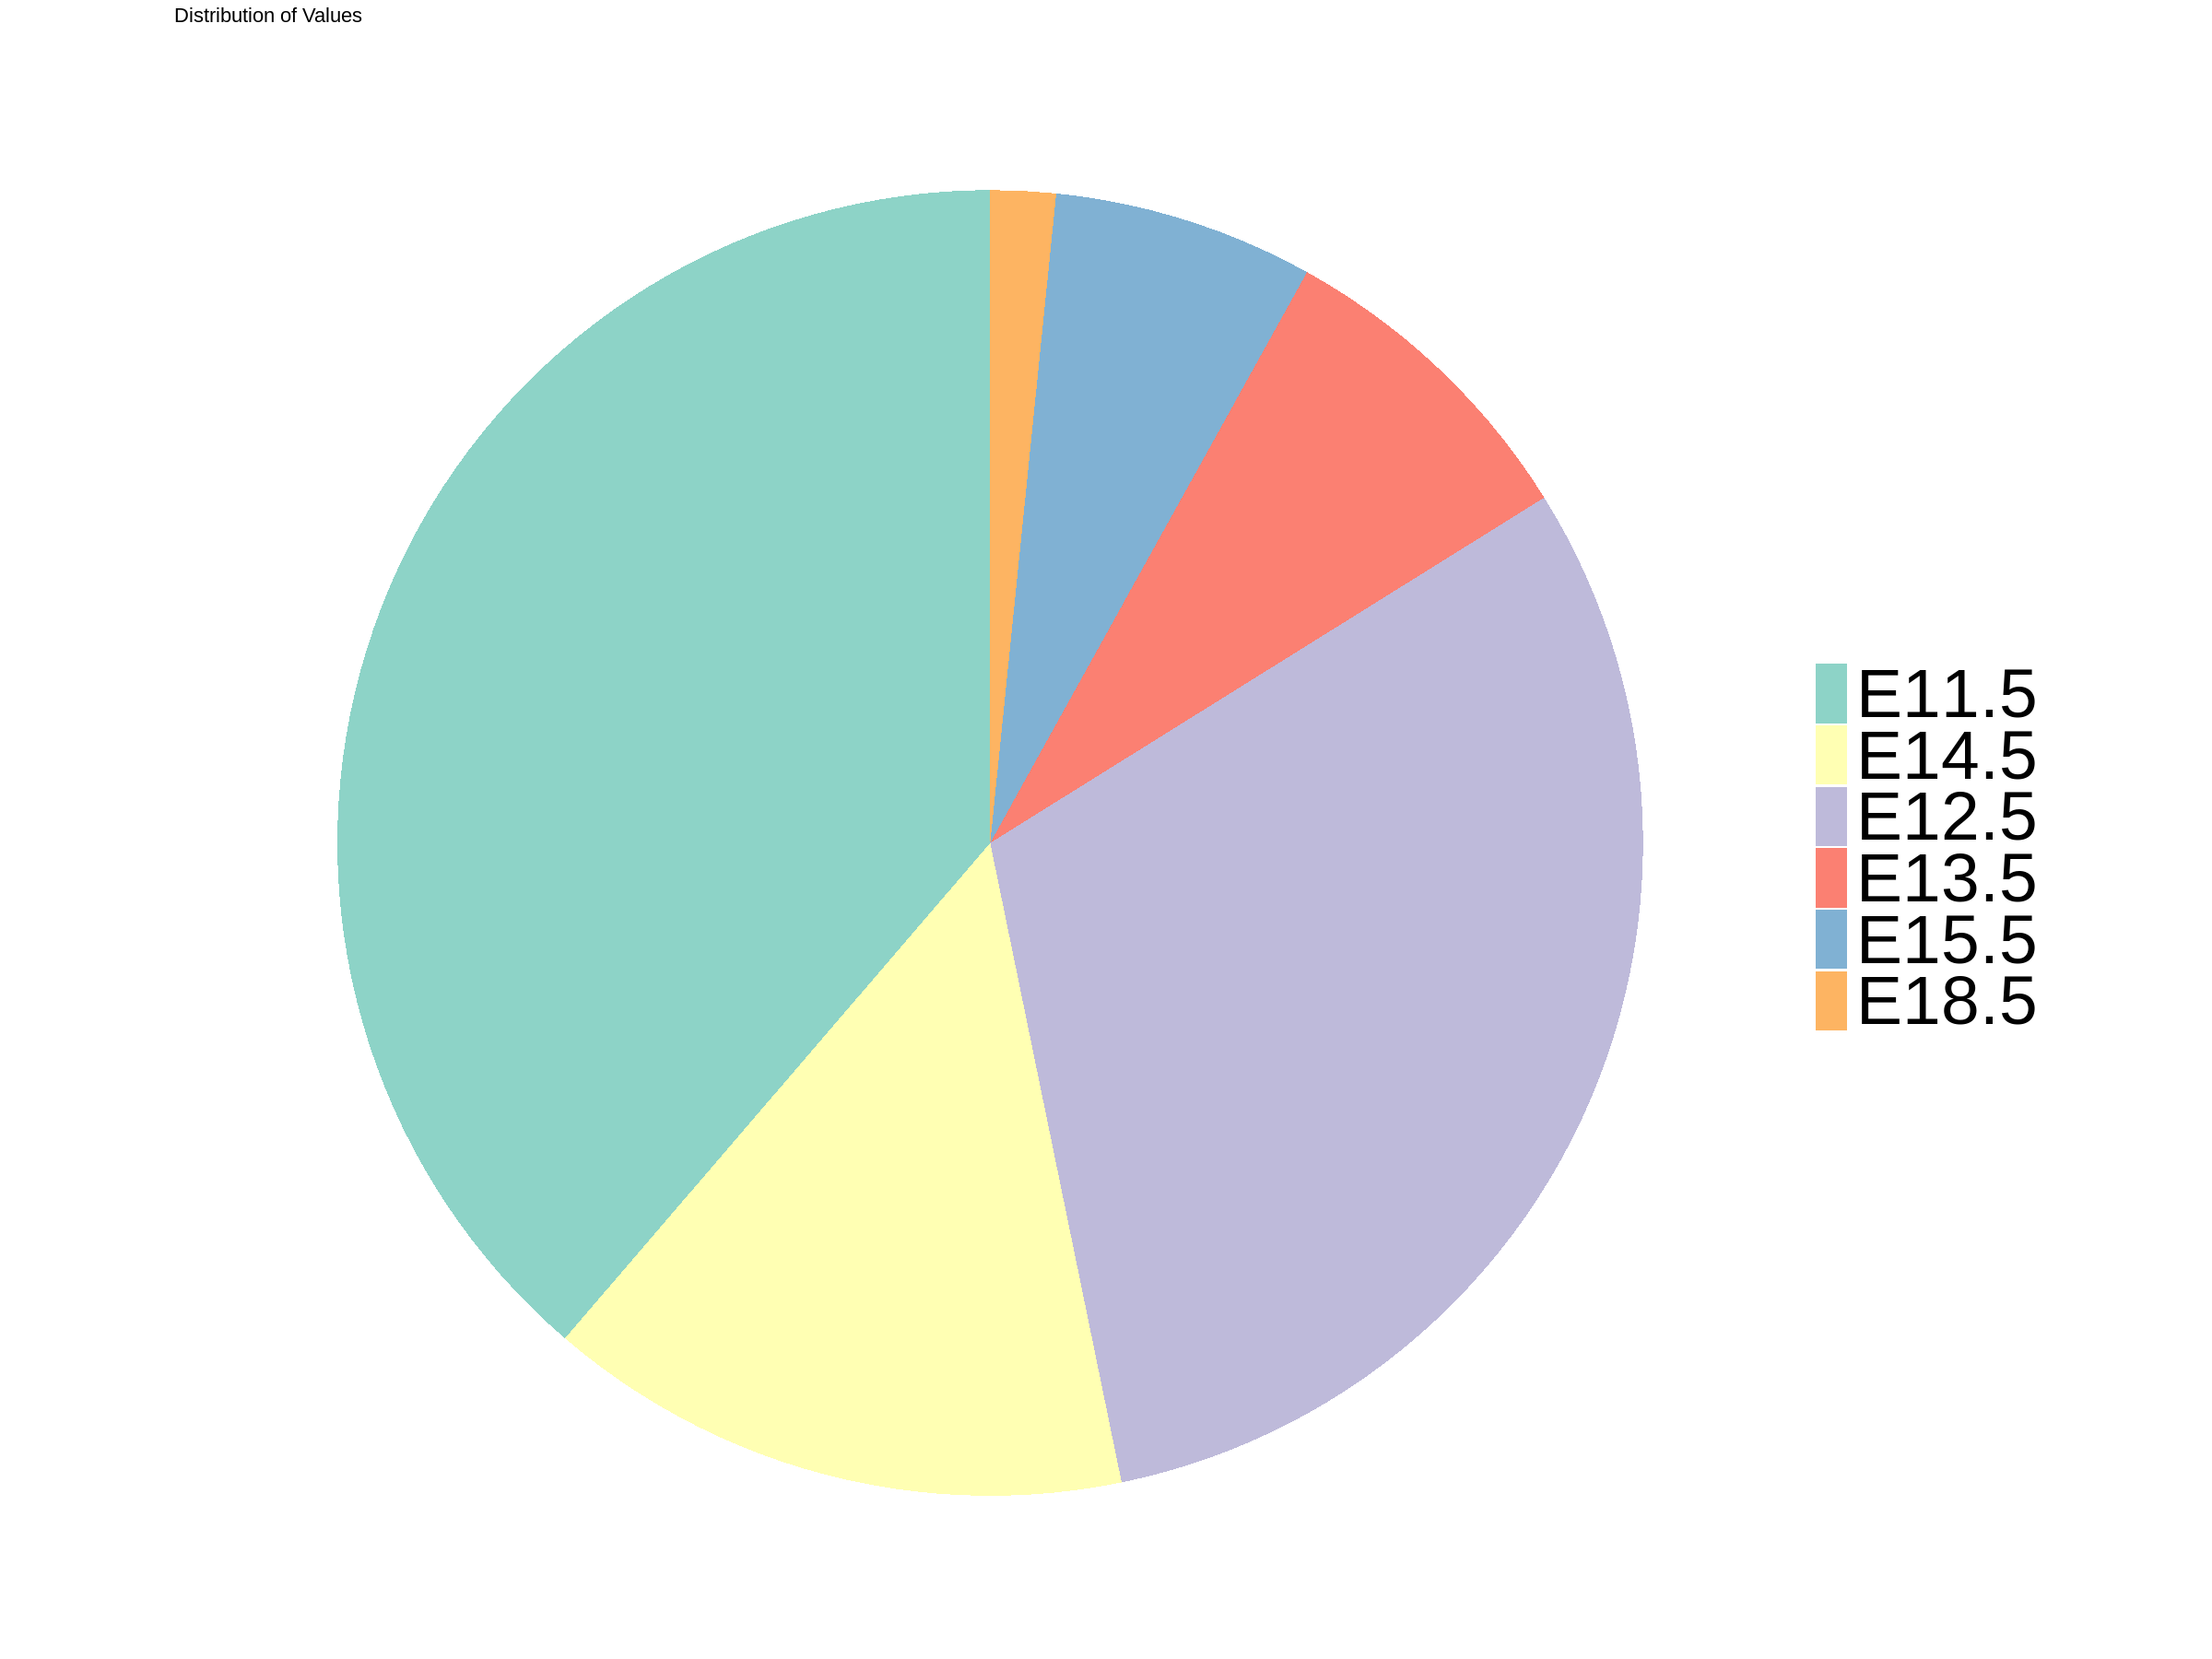

In [14]:
# how many cells per embryonic day? + cake plot

Idents(rgl1) <- 'age'
table(Idents(rgl1))

meta = as.data.frame(table(Idents(rgl1)))
colnames(meta) = c("Stage", "Count")

meta$Stage <- factor(meta$Stage, levels = meta$Stage)

p <- ggplot(meta, aes(x = "", y = Count, fill = Stage)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  theme(legend.title = element_blank(),
        legend.text = element_text(size = 45),
        legend.key.size = unit(1.5, "lines")) +
  labs(title = "Distribution of Values", x = "", y = "") +
  scale_fill_brewer(palette = "Set3")

ggsave("pie_chart_rgl1_mouse.pdf", plot = p, width = 8, height = 6)

p

2 - Extending the CellChat database with the CellTalk and CellPhone databases

In [15]:
# importing the CellTalk database and checking a glimpse
# reference:10.1093/bib/bbaa269

celltalkdb = readRDS("mouse_lr_pair.rds")
head(celltalkdb)

lr_pair   ligand_gene_symbol receptor_gene_symbol ligand_gene_id
1 Wnt3_Fzd6 Wnt3               Fzd6                 22415         
2 Wnt3_Egfr Wnt3               Egfr                 22415         
3 Wnt3_Fzd2 Wnt3               Fzd2                 22415         
4 Wnt3_Lrp5 Wnt3               Lrp5                 22415         
5 Wnt3_Fzd1 Wnt3               Fzd1                 22415         
6 Wnt3_Fzd3 Wnt3               Fzd3                 22415         
  receptor_gene_id ligand_ensembl_protein_id receptor_ensembl_protein_id
1 14368            ENSMUSP00000000127        ENSMUSP00000022906         
2 13649            ENSMUSP00000000127        ENSMUSP00000020329         
3 57265            ENSMUSP00000000127        ENSMUSP00000091463         
4 16973            ENSMUSP00000000127        ENSMUSP00000025856         
5 14362            ENSMUSP00000000127        ENSMUSP00000058629         
6 14365            ENSMUSP00000000127        ENSMUSP00000115325         
  ligand_ensembl_gene_id receptor_ensembl_gene_id evidence
1 ENSMUSG00000000125     ENSMUSG00000022297       19901330
2 ENSMUSG00000000125     ENSMUSG00000020122       17374561
3 ENSMUSG00000000125     ENSMUSG00000050288       31907106
4 ENSMUSG00000000125     ENSMUSG00000024913       11719191
5 ENSMUSG00000000125     ENSMUSG00000044674       20667980
6 ENSMUSG00000000125     ENSMUSG00000007989       18212053

In [16]:
write.table(file="celltalkdb.txt", celltalkdb, quote=FALSE, row.names=FALSE, col.names=TRUE, sep="$")

In [17]:
# harmonizing the CellTalk database to the format of the CellChat database

celltalkdb_filtered = celltalkdb %>% dplyr::select(lr_pair, ligand_gene_symbol, receptor_gene_symbol, evidence)
celltalkdb_filtered$evidence = paste0("celltalkdb_", celltalkdb_filtered$evidence)
colnames(celltalkdb_filtered) = c("interaction_name", "ligand", "receptor", "evidence")
celltalkdb_filtered$interaction_name_2 = celltalkdb_filtered$interaction
celltalkdb_filtered$interaction_name = toupper(celltalkdb_filtered$interaction_name)
rownames(celltalkdb_filtered) = celltalkdb_filtered$interaction_name
celltalkdb_filtered$pathway_name = unlist(lapply(1:nrow(celltalkdb_filtered), FUN=function(x) strsplit(celltalkdb_filtered$interaction_name[x], "_")[[1]][1]))
celltalkdb_filtered$agonist = ""
celltalkdb_filtered$antagonist = ""
celltalkdb_filtered$co_A_receptor = ""
celltalkdb_filtered$co_I_receptor = ""
celltalkdb_filtered$annotation = ""
celltalkdb_filtered = celltalkdb_filtered %>% dplyr::select(interaction_name, pathway_name, ligand, receptor, agonist, antagonist, co_A_receptor, co_I_receptor, evidence, annotation, interaction_name_2)
head(celltalkdb_filtered)

interaction_name pathway_name ligand receptor agonist antagonist
WNT3_FZD6 WNT3_FZD6        WNT3         Wnt3   Fzd6                       
WNT3_EGFR WNT3_EGFR        WNT3         Wnt3   Egfr                       
WNT3_FZD2 WNT3_FZD2        WNT3         Wnt3   Fzd2                       
WNT3_LRP5 WNT3_LRP5        WNT3         Wnt3   Lrp5                       
WNT3_FZD1 WNT3_FZD1        WNT3         Wnt3   Fzd1                       
WNT3_FZD3 WNT3_FZD3        WNT3         Wnt3   Fzd3                       
          co_A_receptor co_I_receptor evidence            annotation
WNT3_FZD6                             celltalkdb_19901330           
WNT3_EGFR                             celltalkdb_17374561           
WNT3_FZD2                             celltalkdb_31907106           
WNT3_LRP5                             celltalkdb_11719191           
WNT3_FZD1                             celltalkdb_20667980           
WNT3_FZD3                             celltalkdb_18212053           
          interaction_name_2
WNT3_FZD6 Wnt3_Fzd6         
WNT3_EGFR Wnt3_Egfr         
WNT3_FZD2 Wnt3_Fzd2         
WNT3_LRP5 Wnt3_Lrp5         
WNT3_FZD1 Wnt3_Fzd1         
WNT3_FZD3 Wnt3_Fzd3

In [18]:
# importing the CellPhone database and checking a glimpse
# reference: 10.1038/s41596-020-0292-x

# IMPORTANT! The CellPhone database has HUMAN interactions, here we are assuming they are the same in MOUSE, with no further processing

library(tools)

cellphonedb = read.csv("cellphonedb.csv")
head(cellphonedb)

id_cp_interaction partner_a                      partner_b protein_name_a
1 NA                12oxoLeukotrieneB4_byPTGR1     Q15722                  
2 NA                12oxoLeukotrieneB4_byPTGR1     Q9NPC1                  
3 NA                22Hydroxycholesterol_byCYP11A1 Q96RI1                  
4 NA                22Hydroxycholesterol_byCYP3A4  Q96RI1                  
5 NA                2arachidonoylglycerol_byDAGLA  P21554                  
6 NA                2arachidonoylglycerol_byDAGLA  P34972                  
  protein_name_b annotation_strategy source                   is_ppi
1 LT4R1_HUMAN    curated             HMRbase;uniprot;reactome False 
2 LT4R2_HUMAN    curated             HMRbase;uniprot;reactome False 
3 NR1H4_HUMAN    curated             HMRbase;uniprot          False 
4 NR1H4_HUMAN    curated             HMRbase;uniprot          False 
5 CNR1_HUMAN     curated             reactome                 False 
6 CNR2_HUMAN     curated             reactome                 False 
  curator       reactome_complex reactome_reaction reactome_pathway
1 LGarciaAlonso R-HSA-416435     R-HSA-391941                      
2 LGarciaAlonso R-HSA-416435     R-HSA-391941                      
3 LGarciaAlonso                                                    
4 LGarciaAlonso                                                    
5 LGarciaAlonso                  R-HSA-419426                      
6 LGarciaAlonso                  R-HSA-419426                      
  complexPortal_complex comments version             
1 NA                             CellPhoneDBcore<=4.1
2 NA                             CellPhoneDBcore<=4.1
3 NA                             CellPhoneDBcore<=4.1
4 NA                             CellPhoneDBcore<=4.1
5 NA                             CellPhoneDBcore<=4.1
6 NA                             CellPhoneDBcore<=4.1

In [19]:
write.table(file="cellphonedb.txt", cellphonedb, quote=FALSE, row.names=FALSE, col.names=TRUE, sep="$")

In [20]:
# harmonizing the CellPhone database to the format of the CellChat database

cellphonedb = cellphonedb%>% dplyr::select(protein_name_a, protein_name_b, source)
colnames(cellphonedb) = c("ligand", "receptor", "evidence")
cellphonedb$ligand = toTitleCase(tolower(unlist(lapply(1:nrow(cellphonedb), FUN=function(x) strsplit(cellphonedb$ligand[x], "_")[[1]][1]))))
cellphonedb$receptor = toTitleCase(tolower(unlist(lapply(1:nrow(cellphonedb), FUN=function(x) strsplit(cellphonedb$receptor[x], "_")[[1]][1]))))
cellphonedb$interaction_name_2 = paste0(cellphonedb$ligand, "_", cellphonedb$receptor)
cellphonedb$interaction_name = toupper(cellphonedb$interaction_name_2)        
cellphonedb$pathway_name = toupper(cellphonedb$ligand)
                                     
cellphonedb = cellphonedb[!is.na(cellphonedb$ligand) & !is.na(cellphonedb$receptor),]
cellphonedb$evidence = paste0("cellphonedb_", cellphonedb$evidence)
cellphonedb$agonist = ""
cellphonedb$antagonist = ""
cellphonedb$co_A_receptor = ""
cellphonedb$co_I_receptor = ""
cellphonedb$annotation = ""
cellphonedb = cellphonedb %>% dplyr::select(interaction_name, pathway_name, ligand, receptor, agonist, antagonist, co_A_receptor, co_I_receptor, evidence, annotation, interaction_name_2)
rownames(cellphonedb) = cellphonedb$interaction_name
head(cellphonedb)

interaction_name pathway_name ligand receptor agonist antagonist
A4_FPR2     A4_FPR2          A4           A4     Fpr2                       
A4_SORL     A4_SORL          A4           A4     Sorl                       
A4_TNR21    A4_TNR21         A4           A4     Tnr21                      
A4_HG2A     A4_HG2A          A4           A4     Hg2a                       
AA1R_ENTP1  AA1R_ENTP1       AA1R         Aa1r   Entp1                      
AA2AR_ENTP1 AA2AR_ENTP1      AA2AR        Aa2ar  Entp1                      
            co_A_receptor co_I_receptor evidence                  annotation
A4_FPR2                                 cellphonedb_reactome                
A4_SORL                                 cellphonedb_uniprot                 
A4_TNR21                                cellphonedb_uniprot                 
A4_HG2A                                 cellphonedb_PMID:19849849           
AA1R_ENTP1                              cellphonedb_uniprot                 
AA2AR_ENTP1                             cellphonedb_uniprot                 
            interaction_name_2
A4_FPR2     A4_Fpr2           
A4_SORL     A4_Sorl           
A4_TNR21    A4_Tnr21          
A4_HG2A     A4_Hg2a           
AA1R_ENTP1  Aa1r_Entp1        
AA2AR_ENTP1 Aa2ar_Entp1

In [21]:
# joining the CellTalk and CellPhone databases

celltalkcellphone = data.frame(rbind(celltalkdb_filtered, cellphonedb))
colnames(celltalkcellphone) = colnames(cellphonedb)
summary_df <- celltalkcellphone %>%
  group_by(across(-evidence)) %>% # removing redundant pairs showing up in both CellTalk and CellPhone
  summarise(evidence = paste(evidence, collapse = ", "))
head(summary_df)
print(nrow(summary_df)) # checking the number of LR pairs imported from the CellPhone and CellTalk databases

`summarise()` has grouped output by 'interaction_name', 'pathway_name',
'ligand', 'receptor', 'agonist', 'antagonist', 'co_A_receptor',
'co_I_receptor', 'annotation'. You can override using the `.groups` argument.


interaction_name pathway_name ligand receptor agonist antagonist
1 A4_FPR2          A4           A4     Fpr2                       
2 A4_HG2A          A4           A4     Hg2a                       
3 A4_PLXA4         A4           A4     Plxa4                      
4 A4_SORL          A4           A4     Sorl                       
5 A4_TNR21         A4           A4     Tnr21                      
6 AA1R_ENTP1       AA1R         Aa1r   Entp1                      
  co_A_receptor co_I_receptor annotation interaction_name_2
1                                        A4_Fpr2           
2                                        A4_Hg2a           
3                                        A4_Plxa4          
4                                        A4_Sorl           
5                                        A4_Tnr21          
6                                        Aa1r_Entp1        
  evidence                             
1 cellphonedb_reactome                 
2 cellphonedb_PMID:19849849            
3 cellphonedb_Shilts screen - VALIDATED
4 cellphonedb_uniprot                  
5 cellphonedb_uniprot                  
6 cellphonedb_uniprot

[1] 2795


In [22]:
# correcting protein names -> gene names in CellphoneDB

ppg = read.table("protein_converted_interactions.txt") # manually curated, it's focused on THIS STUDY, if recycling code take care as some proteins may be missing
ppg$V1 =toTitleCase(tolower(ppg$V1))
ppg$V3 =toTitleCase(tolower(ppg$V3))

summary_df = as.data.frame(summary_df)
rownames(summary_df) = summary_df$interaction_name
celltalk_cellphone = summary_df %>% dplyr::select(interaction_name, pathway_name, ligand, receptor, agonist, antagonist, co_A_receptor, co_I_receptor, evidence, annotation, interaction_name_2)

for(i in 1:nrow(celltalk_cellphone)) {
  matching_index <- which(ppg$V1 == celltalk_cellphone$ligand[i])
  if(length(matching_index) == 1) {
    #print("in")
    celltalk_cellphone$ligand[i] <- ppg$V3[matching_index]
    celltalk_cellphone$pathway_name[i] <- ppg$V3[matching_index]
  }
}


for(i in 1:nrow(celltalk_cellphone)) {
  matching_index <- which(ppg$V1 == celltalk_cellphone$receptor[i])
  if(length(matching_index) == 1) {
    celltalk_cellphone$receptor[i] <- ppg$V3[matching_index]
    celltalk_cellphone$interaction_name[i] = paste0(celltalk_cellphone$ligand[i], "_", celltalk_cellphone$receptor[i])
    try({rownames(celltalk_cellphone)[i] = celltalk_cellphone$interaction_name[i]})
  }
}
celltalk_cellphone

Warning message:
"non-unique value when setting 'row.names': 'Gja3_Gjc1'"


Error in `.rowNamesDF<-`(x, value = value) : 
  duplicate 'row.names' are not allowed


Warning message:
"non-unique value when setting 'row.names': 'Gjc1_Gjc1'"


Error in `.rowNamesDF<-`(x, value = value) : 
  duplicate 'row.names' are not allowed


Warning message:
"non-unique value when setting 'row.names': 'Gjc1_Gj5'"


Error in `.rowNamesDF<-`(x, value = value) : 
  duplicate 'row.names' are not allowed


Warning message:
"non-unique value when setting 'row.names': 'Gjc1_Gjc1'"


Error in `.rowNamesDF<-`(x, value = value) : 
  duplicate 'row.names' are not allowed


interaction_name pathway_name ligand  receptor agonist
A4_FPR2        A4_FPR2          Plp2         Plp2    Fpr2            
Plp2_Cd74      Plp2_Cd74        Plp2         Plp2    Cd74            
Plp2_Plxna4    Plp2_Plxna4      Plp2         Plp2    Plxna4          
Plp2_Sorl1     Plp2_Sorl1       Plp2         Plp2    Sorl1           
Plp2_Tnfrsf21  Plp2_Tnfrsf21    Plp2         Plp2    Tnfrsf21        
Adora1_Entpd1  Adora1_Entpd1    Adora1       Adora1  Entpd1          
Adora2a_Entpd1 Adora2a_Entpd1   Adora2a      Adora2a Entpd1          
Adora2b_Entpd1 Adora2b_Entpd1   Adora2b      Adora2b Entpd1          
Adora3_Entpd1  Adora3_Entpd1    Adora3       Adora3  Entpd1          
ADAM10_AXL     ADAM10_AXL       ADAM10       Adam10  Axl             
ADAM10_CADM1   ADAM10_CADM1     ADAM10       Adam10  Cadm1           
ADAM10_EPHA3   ADAM10_EPHA3     ADAM10       Adam10  Epha3           
ADAM10_ERBB2   ADAM10_ERBB2     ADAM10       Adam10  Erbb2           
ADAM10_FCER2A  ADAM10_FCER2A    ADAM10       Adam10  Fcer2a          
ADAM10_GPNMB   ADAM10_GPNMB     ADAM10       Adam10  Gpnmb           
ADAM10_IL6RA   ADAM10_IL6RA     ADAM10       Adam10  Il6ra           
ADAM10_ITGAV   ADAM10_ITGAV     ADAM10       Adam10  Itgav           
ADAM10_LRP1    ADAM10_LRP1      ADAM10       Adam10  Lrp1            
ADAM10_NOTCH1  ADAM10_NOTCH1    ADAM10       Adam10  Notch1          
ADAM10_NOTCH3  ADAM10_NOTCH3    ADAM10       Adam10  Notch3          
ADAM10_TSPAN10 ADAM10_TSPAN10   ADAM10       Adam10  Tspan10         
ADAM10_TSPAN14 ADAM10_TSPAN14   ADAM10       Adam10  Tspan14         
ADAM10_TSPAN15 ADAM10_TSPAN15   ADAM10       Adam10  Tspan15         
ADAM10_TSPAN17 ADAM10_TSPAN17   ADAM10       Adam10  Tspan17         
ADAM10_TSPAN5  ADAM10_TSPAN5    ADAM10       Adam10  Tspan5          
ADAM12_EPHA1   ADAM12_EPHA1     ADAM12       Adam12  Epha1           
ADAM12_ITGA9   ADAM12_ITGA9     ADAM12       Adam12  Itga9           
ADAM12_ITGB1   ADAM12_ITGB1     ADAM12       Adam12  Itgb1           
ADAM12_SDC4    ADAM12_SDC4      ADAM12       Adam12  Sdc4            
ADAM12_TGFBR2  ADAM12_TGFBR2    ADAM12       Adam12  Tgfbr2          
...            ...              ...          ...     ...      ...    
Wnt8b_Frzb     Wnt8b_Frzb       WNT8B        Wnt8b   Frzb            
WNT8B_SFRP4    WNT8B_SFRP4      WNT8B        Wnt8b   Sfrp4           
WNT8B_SFRP5    WNT8B_SFRP5      WNT8B        Wnt8b   Sfrp5           
WNT8B_WIF1     WNT8B_WIF1       WNT8B        Wnt8b   Wif1            
WNT9A_CER1     WNT9A_CER1       WNT9A        Wnt9a   Cer1            
WNT9A_EGFR     WNT9A_EGFR       WNT9A        Wnt9a   Egfr            
WNT9A_FZD4     WNT9A_FZD4       WNT9A        Wnt9a   Fzd4            
WNT9A_FZD7     WNT9A_FZD7       WNT9A        Wnt9a   Fzd7            
WNT9A_FZD9     WNT9A_FZD9       WNT9A        Wnt9a   Fzd9            
WNT9A_SFRP1    WNT9A_SFRP1      WNT9A        Wnt9a   Sfrp1           
WNT9A_SFRP2    WNT9A_SFRP2      WNT9A        Wnt9a   Sfrp2           
Wnt9a_Frzb     Wnt9a_Frzb       WNT9A        Wnt9a   Frzb            
WNT9A_SFRP4    WNT9A_SFRP4      WNT9A        Wnt9a   Sfrp4           
WNT9A_SFRP5    WNT9A_SFRP5      WNT9A        Wnt9a   Sfrp5           
WNT9A_WIF1     WNT9A_WIF1       WNT9A        Wnt9a   Wif1            
WNT9B_CER1     WNT9B_CER1       WNT9B        Wnt9b   Cer1            
WNT9B_FZD5     WNT9B_FZD5       WNT9B        Wnt9b   Fzd5            
WNT9B_LRP5     WNT9B_LRP5       WNT9B        Wnt9b   Lrp5            
WNT9B_LRP6     WNT9B_LRP6       WNT9B        Wnt9b   Lrp6            
WNT9B_SFRP1    WNT9B_SFRP1      WNT9B        Wnt9b   Sfrp1           
WNT9B_SFRP2    WNT9B_SFRP2      WNT9B        Wnt9b   Sfrp2           
Wnt9b_Frzb     Wnt9b_Frzb       WNT9B        Wnt9b   Frzb            
WNT9B_SFRP4    WNT9B_SFRP4      WNT9B        Wnt9b   Sfrp4           
WNT9B_SFRP5    WNT9B_SFRP5      WNT9B        Wnt9b   Sfrp5           
WNT9B_WIF1     WNT9B_WIF1       WNT9B        Wnt9b   Wif1            
Cx3cl1_Cx3cr1  Cx3cl1_Cx3

In [23]:
# saving to file
write.table(celltalk_cellphone, file="celltalkdb_cellphonedb_harmonized_for_cellchat_20231018LFB.txt", sep="\t", quote=FALSE, row.names=TRUE, col.names=TRUE)

3 - Creating a CellChat object with an extended database including the CellTalk and CellPhone databases

In [42]:
library(CellChat)

# CellChat object inheriting the Seurat object
cellchat <- createCellChat(so, group.by="celltype")

# extending the CellChat database
CellChatDB <- CellChatDB.mouse
celltalk_cellphone = read.delim("celltalkdb_cellphonedb_harmonized_for_cellchat_20231018LFB.txt")
CellChatDB$interaction <- rbind(CellChatDB$interaction, celltalk_cellphone) %>% distinct()

# standard CellChat preprocessing steps
CellChatDB.use <- CellChatDB
cellchat@DB <- CellChatDB.use
cellchat <- subsetData(cellchat)
future::plan("multisession", workers = 4)

[1] "Create a CellChat object from a Seurat object"
The `data` slot in the default assay is used. The default assay is RNA 
The `meta.data` slot in the Seurat object is used as cell meta information 
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  mDA0 mDA1 mDA2 mEpen mGaba mMgl mNbDA mNbL mNbM mNbML mNProg mOMTN mPeric mRgl1 mRgl2 mRgl3 mRN mSert 
Issue identified!! Please check the official Gene Symbol of the following genes:  
 H2-BI H2-Ea-ps Asip Ccl13 Ccl14 Ccl15 Ccl16 Ccl18 Ccl21d Ccl21 Ccl23 Ccl27 Ccl3l1 Cd1d Cd24 Ceacam6 Ceacam8 Clec2a Clec2b C5 Gj5 Cxcl6 Dsg1 Fcer2 Flt3lg Ftl Gnrh2 Gpr15lg Hla-a Hla-b Hla-c Hla-e Hla-f Hla-g Mt-Rnr2 Icam3 Icoslg Igfl1 Igfl2 Cxcl8 Ins Kir2dl5a Cd58 Mln Ncr3lg1 Ntf4 Rln2 Ren Rnaset2 Kitlg Sirpg Gh2 Gh1 Ervh48-1 Tac3 Tnfsf6 Tf Xcl2 Agtr1 Ncr3 Lilra4 Lilrb2 Il6r Cd244 Siglec10 Cd209 Klrf2 Klrf1 Gnrhr2 Kir2dl1 Kir2dl3 Kir3ds1 Lilrb1 Clec4m Lilrb4 Mchr2 Mlnr Npbwr2 Lrrtm Nlgn4x Nlgn4y L1rapl1 Adgre2 T

In [43]:
# standard CellChat pipeline - takes about 2h on Cajal server to run
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

cellchat <- projectData(cellchat, PPI.mouse)

cellchat <- computeCommunProb(cellchat)

# filtering out false positives with too low statistical support (< 10 cells)
cellchat <- filterCommunication(cellchat, min.cells = 10)

cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)

library(patchwork)
options(stringsAsFactors = FALSE)

df.net <- subsetCommunication(cellchat)
df.net_path <- subsetCommunication(cellchat, slot.name = "netP")

cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") 

# saving the CellChat object to file
saveRDS(cellchat, file = "cellchat_mouse_wextendeddatabase.rds")

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-01-31 14:42:32]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-01-31 15:10:12]"


Warning message:
"UNRELIABLE VALUE: One of the 'future.apply' iterations ('future_sapply-1') unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore"."
Warning message:
"UNRELIABLE VALUE: One of the 'future.apply' iterations ('future_sapply-2') unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "igno

4 - Exploring the cell-cell communication network and plotting

In [25]:
# importing the CellChat object created at the previous step

library(CellChat)

cellchat <- readRDS("cellchat_mouse_wextendeddatabase.rds")
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "net") 

library(patchwork)
options(stringsAsFactors = FALSE)

Warning message:
"UNRELIABLE VALUE: One of the 'future.apply' iterations ('future_sapply-1') unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore"."
Warning message:
"UNRELIABLE VALUE: One of the 'future.apply' iterations ('future_sapply-2') unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "igno

In [45]:
# extracting and printing the communication network inferred by CellChat

df.net <- subsetCommunication(cellchat)
head(df.net)

source target ligand receptor  prob         pval interaction_name   
1 mEpen  mMgl   Tgfb2  TGFbR1_R2 0.0010942929 0    TGFB2_TGFBR1_TGFBR2
2 mRgl2  mMgl   Tgfb2  TGFbR1_R2 0.0042129271 0    TGFB2_TGFBR1_TGFBR2
3 mRgl3  mMgl   Tgfb2  TGFbR1_R2 0.0039093751 0    TGFB2_TGFBR1_TGFBR2
4 mEpen  mMgl   Wnt3   FZD3_LRP5 0.0002495417 0    WNT3_FZD3_LRP5     
5 mRgl1  mMgl   Wnt7a  FZD3_LRP5 0.0014453147 0    WNT7A_FZD3_LRP5    
6 mRgl1  mMgl   Wnt7b  FZD3_LRP5 0.0016032115 0    WNT7B_FZD3_LRP5    
  interaction_name_2       pathway_name annotation        
1 Tgfb2  - (Tgfbr1+Tgfbr2) TGFb         Secreted Signaling
2 Tgfb2  - (Tgfbr1+Tgfbr2) TGFb         Secreted Signaling
3 Tgfb2  - (Tgfbr1+Tgfbr2) TGFb         Secreted Signaling
4 Wnt3  - (Fzd3+Lrp5)      WNT          Secreted Signaling
5 Wnt7a  - (Fzd3+Lrp5)     WNT          Secreted Signaling
6 Wnt7b  - (Fzd3+Lrp5)     WNT          Secreted Signaling
  evidence                      
1 KEGG: mmu04350                
2 KEGG: mmu04350                
3 KEGG: mmu04350                
4 KEGG: mmu04310; PMID: 23209147
5 KEGG: mmu04310; PMID: 23209147
6 KEGG: mmu04310; PMID: 23209147

In [46]:
# the dataset from La Manno et al. 2016 had low depth per cell so we have to devise stategies to keep false positives under control (i.e., to avoid cell communications dictated by genes whose expression is too low and probably just noise)
# the authors of the paper proposed a method to discover, for each cell type, if any given gene was "above baseline". 
# here, we'll keep cell-cell communications only when both ligand in source cell type and receptor in target cell type are above baseline

# importing the table from the original study reporting whether a gene is above baseline or not
mouse_binary = read.delim("Mouse_binary.tsv")

communication = df.net
rownames(mouse_binary) = mouse_binary$X

communication$ligand_expressed <- 0
communication$receptor_expressed <- 0

for (i in 1:nrow(communication)) {
    
  # get the source cell type and ligand for this row
  source <- as.character(communication$source[i])
  ligand <- communication$ligand[i]
  
  # check if the ligand is expressed in the source cell type
  try({if (mouse_binary[ligand, source] == 1) {
    communication$ligand_expressed[i] <- 1
  }}, silent=TRUE)
  
  # get the target cell type and receptor for this row
  target <- as.character(communication$target[i])
  receptor <- communication$receptor[i]
  
  # check if the receptor is expressed in the target cell type
  try({if (mouse_binary[receptor, target] == 1) {
    communication$receptor_expressed[i] <- 1
  }}, silent=TRUE)
  
}

In [47]:
communication_filtered = communication[communication$receptor_expressed & communication$ligand_expressed,]

# potentially focusing only on the signaling LR pairs or pathways of interest
# communication_filtered = communication_filtered[communication_filtered$pathway_name %in% neurodev_pathways,]

In [48]:
head(communication_filtered)

source target ligand receptor prob        pval interaction_name
72 mDA0   mNbM   Wnt5a  Fzd2     0.001886093 0    WNT5A_FZD2      
75 mNbDA  mNbM   Wnt5a  Fzd2     0.003285608 0    WNT5A_FZD2      
78 mRgl1  mNbM   Wnt5a  Fzd2     0.002228232 0    WNT5A_FZD2      
80 mRgl3  mNbM   Wnt5a  Fzd2     0.010338482 0    WNT5A_FZD2      
81 mDA0   mNProg Wnt5a  Fzd2     0.002063998 0    WNT5A_FZD2      
84 mNbDA  mNProg Wnt5a  Fzd2     0.003595046 0    WNT5A_FZD2      
   interaction_name_2 pathway_name annotation         evidence      
72 Wnt5a  - Fzd2      ncWNT        Secreted Signaling KEGG: mmu04310
75 Wnt5a  - Fzd2      ncWNT        Secreted Signaling KEGG: mmu04310
78 Wnt5a  - Fzd2      ncWNT        Secreted Signaling KEGG: mmu04310
80 Wnt5a  - Fzd2      ncWNT        Secreted Signaling KEGG: mmu04310
81 Wnt5a  - Fzd2      ncWNT        Secreted Signaling KEGG: mmu04310
84 Wnt5a  - Fzd2      ncWNT        Secreted Signaling KEGG: mmu04310
   ligand_expressed receptor_expressed
72 1                1                 
75 1                1                 
78 1                1                 
80 1                1                 
81 1                1                 
84 1                1

In [49]:
unique(communication$source)

[1] mEpen  mRgl2  mRgl3  mRgl1  mDA0   mDA2   mNbDA  mNbM   mNProg mOMTN 
[11] mMgl   mPeric mDA1   mGaba  mNbL   mNbML  mRN    mSert 
18 Levels: mDA0 mDA1 mDA2 mEpen mGaba mMgl mNbDA mNbL mNbM mNbML ... mSert

In [50]:
library(RColorBrewer)

humouse = read.table("mouse_human_2.txt", sep="\t") #### manually generated  set of colors to ensure consistency between cell types in mouse and human datasets
colnames(humouse) = c("mouse", "human")
custom_palette <- c(brewer.pal(8, "Dark2"), brewer.pal(12, "Paired"), brewer.pal(2, "Accent"))
color_count <- nrow(humouse)
if(color_count > length(custom_palette)) {
    stop("Not enough unique colors in the custom palette for each data row!")
} else {
    humouse$color <- custom_palette[1:color_count]
}

cn = colnames(humouse)
colnames(humouse) = cn
humouse

Warning message in brewer.pal(2, "Accent"):
"minimal value for n is 3, returning requested palette with 3 different levels
"


mouse  human       color  
1  mDA0   FP-DA0      #1B9E77
2  mNbDA              #D95F02
3  mRgl1  FP-Rgl1     #7570B3
4  mRgl3  Rgl3        #E7298A
5  mPeric             #66A61E
6  mMgl               #E6AB02
7  mDA1   DA_ALDH1A1- #A6761D
8  mDA2   DA_ALDH1A1+ #666666
9  mNbM   FP-NbM      #A6CEE3
10 mNProg NProg       #1F78B4
11 mRgl2  Rgl2        #B2DF8A
12 mOMTN  OMTN        #33A02C
13 mSert              #FB9A99
14 mRN    RN          #E31A1C
15        ProgFP      #FDBF6F
16        Gaba        #FF7F00
17        GabaNb      #CAB2D6
18        NbML1       #6A3D9A
19        ProgBP      #FFFF99
20        nonFP-DA0   #B15928
21        nonFP-NbM   #7FC97F
22        nonFP-Rgl1  #BEAED4

Warning message:
"ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


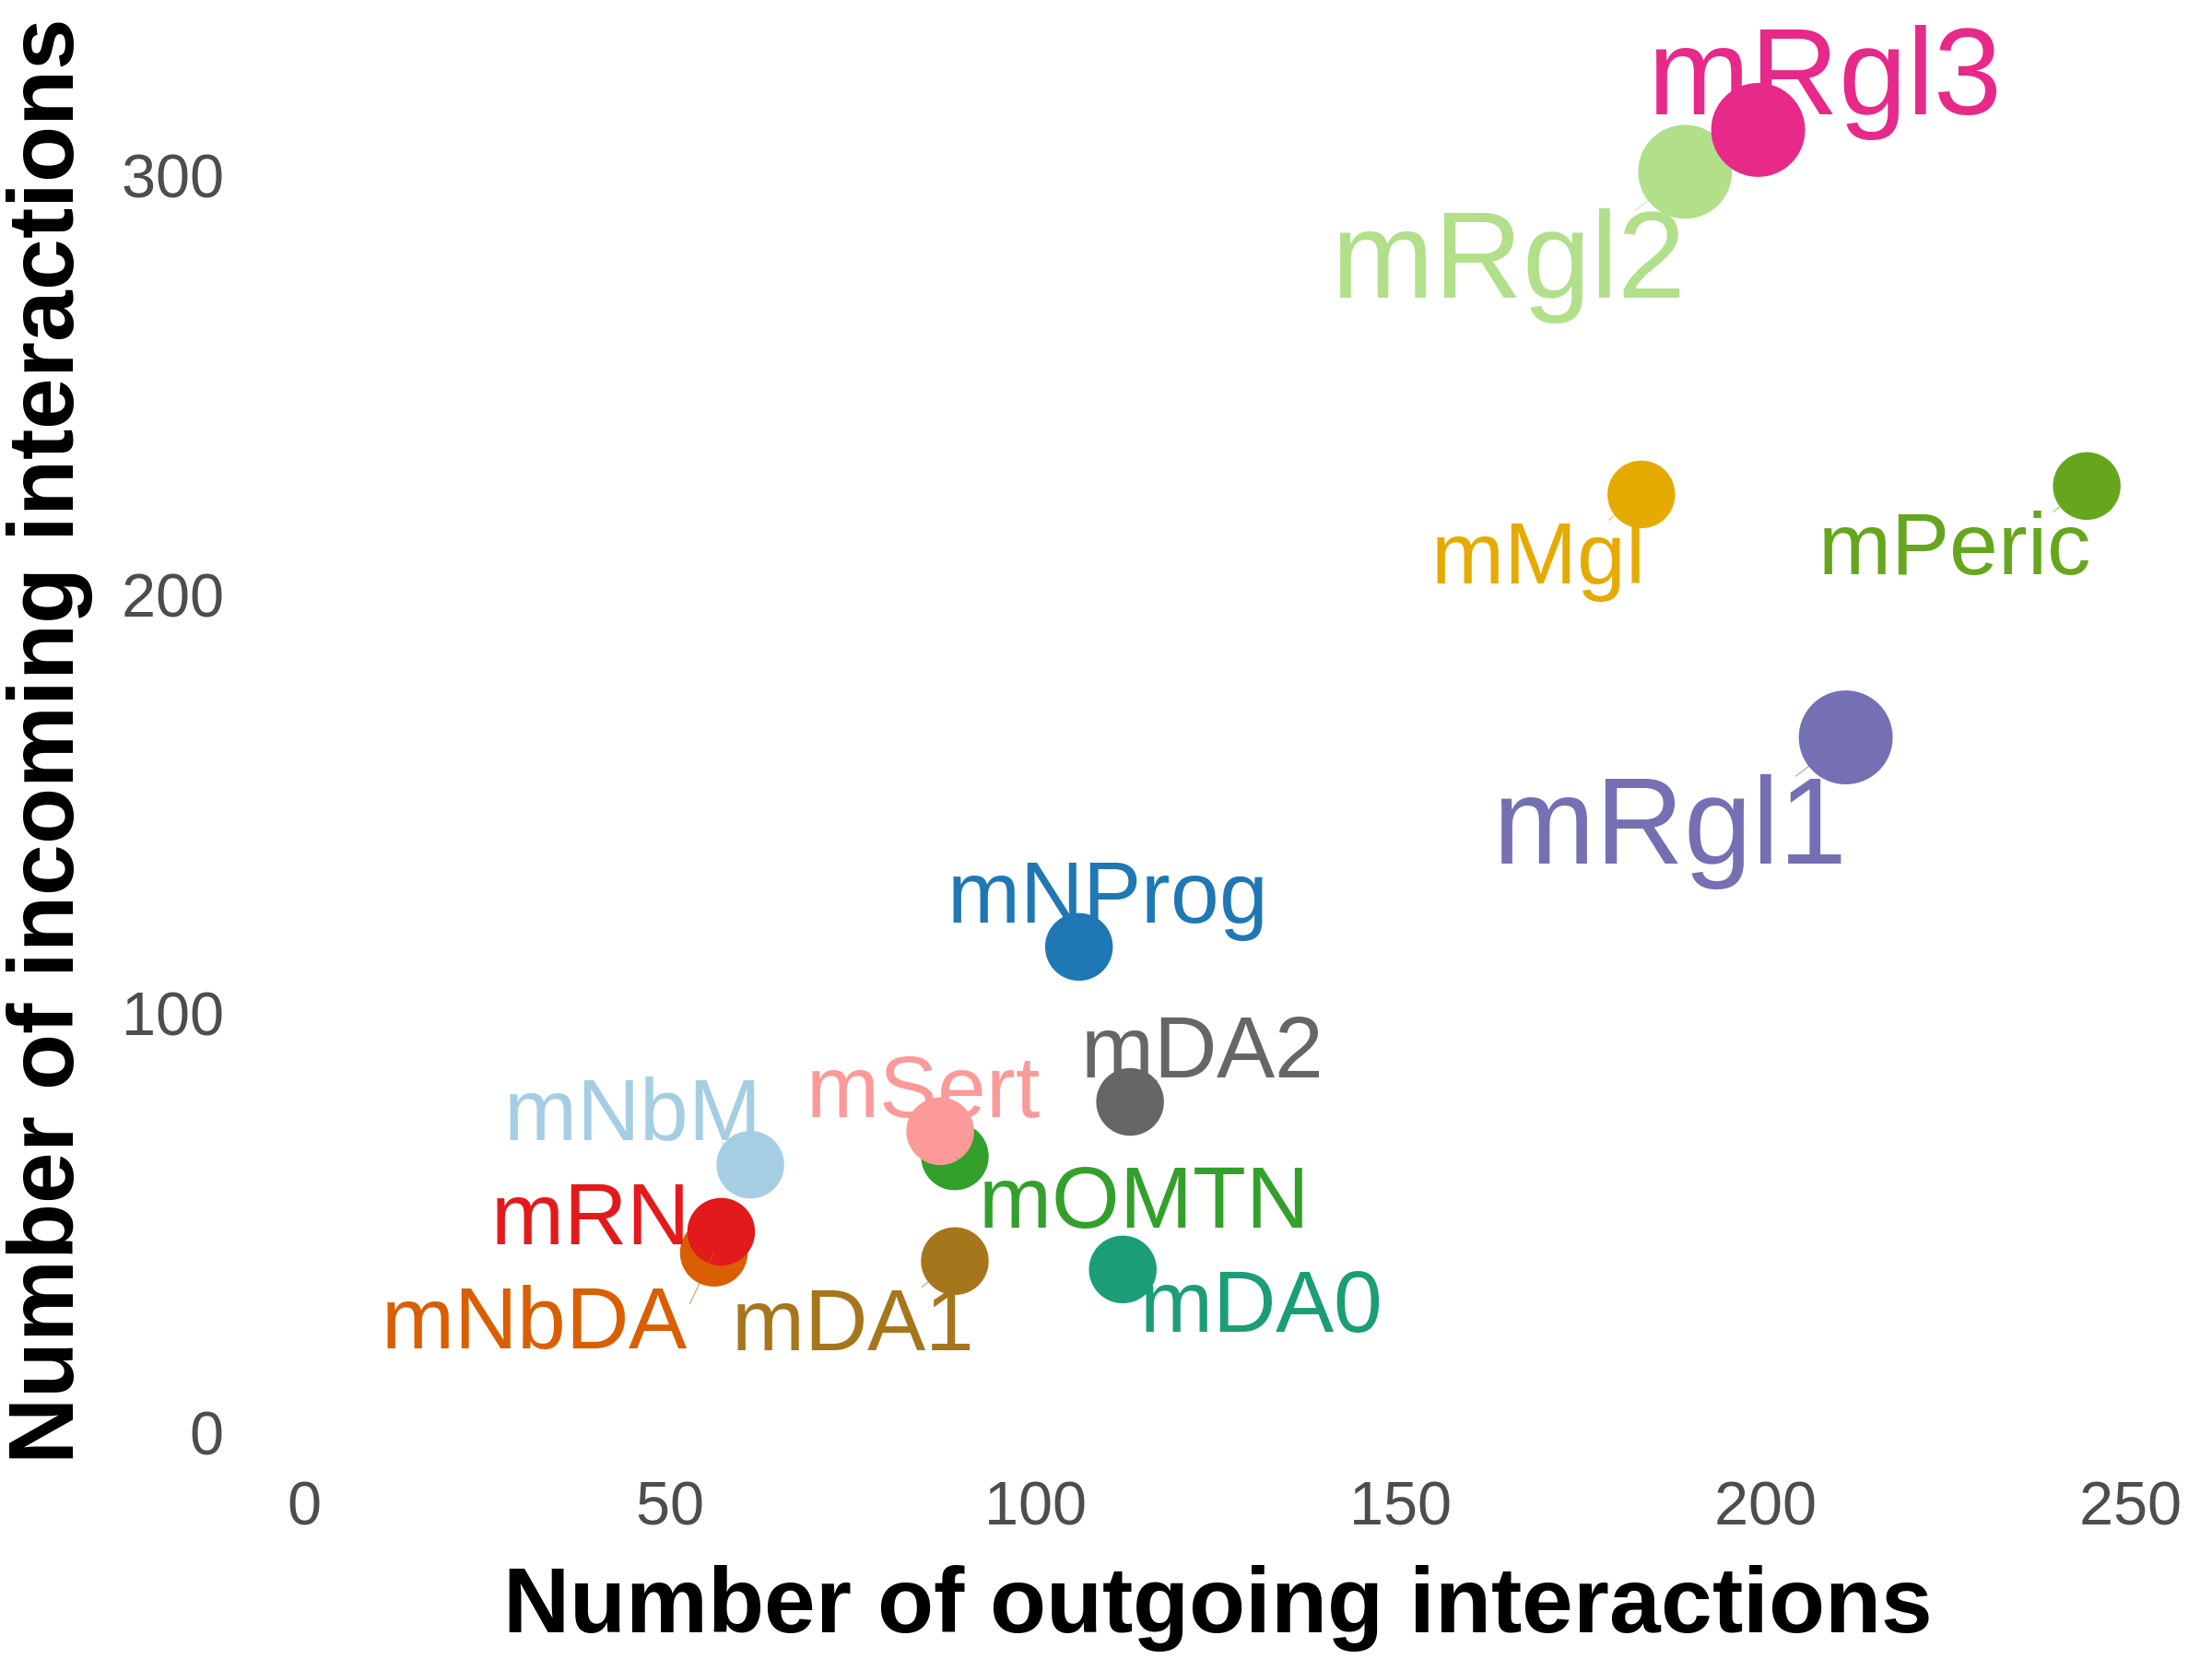

In [52]:
library(ggrepel)

pdf("m_scatter.pdf", width = 20, height = 15)

# overall signaling center in the dataset, as for sources and targets of signals. note, we are using all time points, all cell types, all ligand and receptors from the 3 DBs
# one could as well subset, eg to only look at neurodevelopmentally-related LR pairs and pathways
options(repr.plot.width=20, repr.plot.height=15)
df = communication_filtered

library(RColorBrewer)

# count occurrences for each cell type as signal source or signal target
source_counts <- df %>% group_by(source) %>% summarise(count_source = n())
target_counts <- df %>% group_by(target) %>% summarise(count_target = n())

# join the counts
counts_df <- full_join(source_counts, target_counts, by = c("source" = "target"))

# replace NA values with 0
counts_df[is.na(counts_df)] <- 0

# Merge counts_df with humouse to get corresponding colors
merged_df <- left_join(counts_df, humouse, by = c("source" = "mouse"))

# Use the new color column in ggplot
ggplot(merged_df, aes(x=count_source, y=count_target, color=color, label=source)) +
  geom_point(aes(size = ifelse(source %in% c("mRgl3", "mRgl2", "mRgl1"), 28, 20))) +  # Double size selectively
  scale_color_identity() +  # Use the actual color values from the color column
  geom_text_repel(aes(size = ifelse(source %in% c("mRgl3", "mRgl2", "mRgl1"), 28, 20)),  # Double text size selectively
                  vjust=1.5, hjust=1, nudge_x = 0.5, box.padding = 1, segment.size = 0.2) +
  labs(
    x="Number of outgoing interactions", 
    y="Number of incoming interactions"
  ) +
  scale_x_continuous(limits = c(-10, 260), expand = c(0, 0)) + 
  scale_y_continuous(limits = c(-10, 340), expand = c(0, 0)) +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 60, face = "bold", margin = margin(t = 20)),
    axis.title.y = element_text(size = 60, face = "bold", margin = margin(r = 20)),
    axis.text.x = element_text(size = 40),
    axis.text.y = element_text(size = 40),
    legend.position = "none",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank()
  ) +
  scale_size_identity(guide = "none")
dev.off()

In [57]:
counts_df_ground_truth = counts_df

df_to_bootstrap = df %>% dplyr::select(source, target, ligand, receptor)

ligands = unique(df$ligand)

receptors = unique(df$receptor)

library(Seurat)

Idents(so) = "celltype"
celltypes <- unique(Idents(so))

celltypes <- unique(Idents(so))

avg_expression <- data.frame(matrix(ncol = length(ligands), nrow = length(celltypes)))
rownames(avg_expression) <- celltypes
colnames(avg_expression) <- ligands

# Calculate average expression for each ligand in each cell type
for (ligand in ligands) {
    for (celltype in celltypes) {
        cells <- WhichCells(so, ident = celltype)
        avg_expression[celltype, ligand] <- mean(FetchData(so, vars = ligand, cells = cells)[[1]])
    }
}

# Initialize a list to store cell types in each trile for each ligand
trile_celltypes <- list()

for (ligand in ligands) {
    # Calculate the trile thresholds
    thresholds <- quantile(avg_expression[[ligand]], probs = seq(0, 1, by = 1/3))
    
    # Initialize a list for this ligand
    trile_celltypes[[ligand]] <- vector("list", 3)
    names(trile_celltypes[[ligand]]) <- paste0("T", 1:3)

    for (celltype in celltypes) {
        # Determine the trile for the cell type
        for (t in 1:3) {
            if (avg_expression[celltype, ligand] <= thresholds[t + 1]) {
                trile_name <- paste0("T", t)
                trile_celltypes[[ligand]][[trile_name]] <- c(trile_celltypes[[ligand]][[trile_name]], celltype)
                break
            }
        }
    }
}

trile_celltypes_ligands <- trile_celltypes
trile_celltypes_ligands

library(Seurat)

celltypes <- unique(Idents(so))

avg_expression <- data.frame(matrix(ncol = length(receptors), nrow = length(celltypes)))
rownames(avg_expression) <- celltypes
colnames(avg_expression) <- receptors

# Calculate average expression for each receptor in each cell type
for (receptor in receptors) {
    for (celltype in celltypes) {
        cells <- WhichCells(so, ident = celltype)
        avg_expression[celltype, receptor] <- mean(FetchData(so, vars = receptor, cells = cells)[[1]])
    }
}

# Initialize a list to store cell types in each trile for each receptor
trile_celltypes <- list()

for (receptor in receptors) {
    # Calculate the trile thresholds
    thresholds <- quantile(avg_expression[[receptor]], probs = seq(0, 1, by = 1/3))
    
    # Initialize a list for this receptor
    trile_celltypes[[receptor]] <- vector("list", 3)
    names(trile_celltypes[[receptor]]) <- paste0("T", 1:3)

    for (celltype in celltypes) {
        # Determine the trile for the cell type
        for (t in 1:3) {
            if (avg_expression[celltype, receptor] <= thresholds[t + 1]) {
                trile_name <- paste0("T", t)
                trile_celltypes[[receptor]][[trile_name]] <- c(trile_celltypes[[receptor]][[trile_name]], celltype)
                break
            }
        }
    }
}

trile_celltypes_receptors <- trile_celltypes
trile_celltypes_receptors

df_to_bootstrap$source <- as.character(df_to_bootstrap$source)
df_to_bootstrap$target <- as.character(df_to_bootstrap$target)

library(Seurat)
Idents(so) = "celltype"
celltypes <- unique(Idents(so))

avg_expression <- data.frame(matrix(ncol = length(ligands), nrow = length(celltypes)))
rownames(avg_expression) <- celltypes
colnames(avg_expression) <- ligands

library(dplyr)

cumulative_source_counts <- data.frame(matrix(nrow=18, ncol=0))
cumulative_target_counts <- data.frame(matrix(nrow=18, ncol=0))

for (i in 1:10000) {
    print(i)
    df_modified <- df_to_bootstrap

    for (y in 1:nrow(df_modified)){
        L = df_modified$ligand[y]
        q = trile_celltypes_ligands[[L]]
        needle = df_modified$source[y]
        trile = names(q)[unlist(lapply(q[1:3], function(x) needle %in% x))]                               
        SOURCE_NEW = sample(q[[trile]], 1)    

        R = df_modified$receptor[y]
        q = trile_celltypes_receptors[[R]]
        needle = df_modified$target[y]
        trile = names(q)[unlist(lapply(q[1:3], function(x) needle %in% x))]                               
        TARGET_NEW = sample(q[[trile]], 1)   

        df_modified$source[y] = SOURCE_NEW          
        df_modified$target[y] = TARGET_NEW      
    }

    source_counts <- df_modified %>% group_by(source) %>% summarise(count_source = n())
    target_counts <- df_modified %>% group_by(target) %>% summarise(count_target = n())

    cumulative_source_counts <- data.frame(cbind(cumulative_source_counts, source_counts$count_source))
    cumulative_target_counts <- data.frame(cbind(cumulative_target_counts, target_counts$count_target))
}

rownames(cumulative_source_counts) = source_counts$source
rownames(cumulative_target_counts) = target_counts$target
                                       
library(gridExtra)

$Wnt5a
$Wnt5a$T1
[1] "mMgl"  "mNbML" "mSert" "mGaba" "mOMTN" "mRN"  

$Wnt5a$T2
[1] "mPeric" "mRgl2"  "mNbL"   "mNbM"   "mDA1"   "mDA2"  

$Wnt5a$T3
[1] "mNProg" "mEpen"  "mRgl3"  "mRgl1"  "mDA0"   "mNbDA" 


$Igf2
$Igf2$T1
[1] "mEpen" "mRgl1" "mNbM"  "mDA1"  "mDA2"  "mOMTN" "mRN"  

$Igf2$T2
[1] "mRgl2" "mNbML" "mNbL"  "mSert" "mGaba"

$Igf2$T3
[1] "mPeric" "mMgl"   "mNProg" "mRgl3"  "mDA0"   "mNbDA" 


$Ccl3
$Ccl3$T1
 [1] "mNProg" "mEpen"  "mRgl3"  "mRgl1"  "mNbL"   "mNbM"   "mDA1"   "mDA2"  
 [9] "mSert"  "mOMTN"  "mRN"   

$Ccl3$T2
[1] "mGaba"

$Ccl3$T3
[1] "mPeric" "mMgl"   "mRgl2"  "mNbML"  "mDA0"   "mNbDA" 


$Ccl9
$Ccl9$T1
 [1] "mPeric" "mEpen"  "mRgl3"  "mRgl1"  "mRgl2"  "mNbML"  "mNbM"   "mDA1"  
 [9] "mDA2"   "mDA0"   "mNbDA"  "mSert"  "mGaba"  "mOMTN"  "mRN"   

$Ccl9$T2
NULL

$Ccl9$T3
[1] "mMgl"   "mNProg" "mNbL"  


$Ccl6
$Ccl6$T1
 [1] "mNProg" "mEpen"  "mRgl3"  "mRgl1"  "mRgl2"  "mNbML"  "mNbL"   "mNbM"  
 [9] "mDA1"   "mDA2"   "mDA0"   "mNbDA"  "mSert"  "mGaba"  "mOMTN"  "mRN"   

$Ccl6$T2
NULL

$Ccl6$T3
[1] "mPeric" "mMgl"  


$Ccl4
$Ccl4$T1
 [1] "mNProg" "mEpen"  "mRgl3"  "mRgl1"  "mNbM"   "mDA1"   "mDA2"   "mDA0"  
 [9] "mNbDA"  "mOMTN"  "mRN"   

$Ccl4$T2
[1] "mGaba"

$Ccl4$T3
[1] "mPeric" "mMgl"   "mRgl2"  "mNbML"  "mNbL"   "mSert" 


$Cx3cl1
$Cx3cl1$T1
[1] "mPeric" "mMgl"   "mNProg" "mNbM"   "mDA0"   "mNbDA" 

$Cx3cl1$T2
[1] "mRgl1" "mRgl2" "mNbML" "mNbL"  "mOMTN" "mRN"  

$Cx3cl1$T3
[1] "mEpen" "mRgl3" "mDA1"  "mDA2"  "mSert" "mGaba"


$Csf1
$Csf1$T1
[1] "mRgl3" "mNbM"  "mDA1"  "mDA2"  "mDA0"  "mNbDA"

$Csf1$T2
[1] "mNProg" "mRgl2"  "mNbML"  "mSert"  "mGaba"  "mOMTN" 

$Csf1$T3
[1] "mPeric" "mMgl"   "mEpen"  "mRgl1"  "mNbL"   "mRN"   


$Angptl4
$Angptl4$T1
[1] "mEpen" "mNbM"  "mDA1"  "mDA2"  "mDA0"  "mNbDA" "mOMTN" "mRN"  

$Angptl4$T2
[1] "mNbML" "mNbL"  "mSert" "mGaba"

$Angptl4$T3
[1] "mPeric" "mMgl"   "mNProg" "mRgl3"  "mRgl1"  "mRgl2" 


$Mdk
$Mdk$T1
[1] "mDA1"  "mDA2"  "mDA0"  "mSert" "mGaba" "mRN"  

$Mdk$T2
[1] "mMgl"  "mEpen" "mNbML" "mNbL"  "mNbDA" "mOMTN"

$Mdk$T3
[1] "mPeric" "mNProg" "mRgl3"  "mRgl1"  "mRgl2"  "mNbM"  


$Ptn
$Ptn$T1
[1] "mNbML" "mNbL"  "mNbM"  "mDA0"  "mNbDA" "mSert"

$Ptn$T2
[1] "mMgl"   "mNProg" "mRgl3"  "mDA1"   "mDA2"   "mRN"   

$Ptn$T3
[1] "mPeric" "mEpen"  "mRgl1"  "mRgl2"  "mGaba"  "mOMTN" 


$Edn1
$Edn1$T1
[1] "mPeric" "mRgl3"  "mRgl1"  "mNbML"  "mDA2"   "mDA0"  

$Edn1$T2
[1] "mRgl2" "mDA1"  "mNbDA" "mSert" "mOMTN" "mRN"  

$Edn1$T3
[1] "mMgl"   "mNProg" "mEpen"  "mNbL"   "mNbM"   "mGaba" 


$Tac1
$Tac1$T1
[1] "mEpen" "mRgl3" "mRgl1" "mRgl2" "mDA0"  "mSert"

$Tac1$T2
[1] "mPeric" "mMgl"   "mNProg" "mDA1"   "mNbDA"  "mRN"   

$Tac1$T3
[1] "mNbML" "mNbL"  "mNbM"  "mDA2"  "mGaba" "mOMTN"


$Kitl
$Kitl$T1
[1] "mNbML" "mDA1"  "mDA2"  "mDA0"  "mNbDA" "mSert"

$Kitl$T2
[1] "mMgl"  "mRgl2" "mNbL"  "mNbM"  "mGaba" "mRN"  

$Kitl$T3
[1] "mPeric" "mNProg" "mEpen"  "mRgl3"  "mRgl1"  "mOMTN" 


$Sema3c
$Sema3c$T1
[1] "mPeric" "mRgl1"  "mRgl2"  "mNbM"   "mDA1"   "mDA2"  

$Sema3c$T2
[1] "mMgl"   "mNProg" "mNbML"  "mDA0"   "mNbDA"  "mRN"   

$Sema3c$T3
[1] "mEpen" "mRgl3" "mNbL"  "mSert" "mGaba" "mOMTN"


$Enho
$Enho$T1
[1] "mPeric" "mMgl"   "mNProg" "mRgl1"  "mNbM"   "mNbDA" 

$Enho$T2
[1] "mRgl3" "mNbML" "mDA1"  "mDA2"  "mDA0"  "mOMTN"

$Enho$T3
[1] "mEpen" "mRgl2" "mNbL"  "mSert" "mGaba" "mRN"  


$Gas6
$Gas6$T1
[1] "mPeric" "mNProg" "mRgl1"  "mNbM"   "mDA0"   "mNbDA" 

$Gas6$T2
[1] "mRgl3" "mRgl2" "mNbML" "mNbL"  "mDA2"  "mSert"

$Gas6$T3
[1] "mMgl"  "mEpen" "mDA1"  "mGaba" "mOMTN" "mRN"  


$Lgals9
$Lgals9$T1
 [1] "mPeric" "mEpen"  "mRgl3"  "mRgl1"  "mRgl2"  "mNbML"  "mDA1"   "mDA2"  
 [9] "mDA0"   "mNbDA"  "mSert"  "mOMTN"  "mRN"   

$Lgals9$T2
NULL

$Lgals9$T3
[1] "mMgl"   "mNProg" "mNbL"   "mNbM"   "mGaba" 


$Pros1
$Pros1$T1
[1] "mEpen" "mNbML" "mDA1"  "mDA2"  "mDA0"  "mNbDA"

$Pros1$T2
[1] "mNbL"  "mNbM"  "mSert" "mGaba" "mOMTN" "mRN"  

$Pros1$T3
[1] "mPeric" "mMgl"   "mNProg" "mRgl3"  "mRgl1"  "mRgl2" 


$Psap
$Psap$T1
[1] "mPeric" "mNbML"  "mNbM"   "mDA1"   "mNbDA"

$Fzd2
$Fzd2$T1
[1] "mDA1"  "mDA2"  "mSert" "mGaba" "mOMTN" "mRN"  

$Fzd2$T2
[1] "mMgl"  "mEpen" "mNbML" "mNbL"  "mDA0"  "mNbDA"

$Fzd2$T3
[1] "mPeric" "mNProg" "mRgl3"  "mRgl1"  "mRgl2"  "mNbM"  


$Fzd3
$Fzd3$T1
[1] "mPeric" "mMgl"   "mDA1"   "mDA2"   "mSert"  "mGaba" 

$Fzd3$T2
[1] "mNProg" "mNbML"  "mDA0"   "mNbDA"  "mOMTN"  "mRN"   

$Fzd3$T3
[1] "mEpen" "mRgl3" "mRgl1" "mRgl2" "mNbL"  "mNbM" 


$Fzd9
$Fzd9$T1
[1] "mMgl"  "mEpen" "mNbM"  "mDA1"  "mDA2"  "mDA0"  "mNbDA" "mRN"  

$Fzd9$T2
[1] "mNbML" "mNbL"  "mSert" "mOMTN"

$Fzd9$T3
[1] "mPeric" "mNProg" "mRgl3"  "mRgl1"  "mRgl2"  "mGaba" 


$Mcam
$Mcam$T1
[1] "mNbM"  "mDA1"  "mDA2"  "mDA0"  "mNbDA" "mSert"

$Mcam$T2
[1] "mMgl"   "mNProg" "mRgl3"  "mNbML"  "mGaba"  "mRN"   

$Mcam$T3
[1] "mPeric" "mEpen"  "mRgl1"  "mRgl2"  "mNbL"   "mOMTN" 


$Igf2r
$Igf2r$T1
[1] "mMgl"   "mNProg" "mRgl1"  "mNbM"   "mDA2"   "mDA0"  

$Igf2r$T2
[1] "mNbML" "mDA1"  "mNbDA" "mSert" "mGaba" "mOMTN"

$Igf2r$T3
[1] "mPeric" "mEpen"  "mRgl3"  "mRgl2"  "mNbL"   "mRN"   


$Ccr1
$Ccr1$T1
 [1] "mEpen" "mRgl3" "mNbM"  "mDA1"  "mDA2"  "mDA0"  "mNbDA" "mSert" "mOMTN"
[10] "mRN"  

$Ccr1$T2
[1] "mNbML" "mNbL" 

$Ccr1$T3
[1] "mPeric" "mMgl"   "mNProg" "mRgl1"  "mRgl2"  "mGaba" 


$Ccr5
$Ccr5$T1
 [1] "mNProg" "mEpen"  "mRgl3"  "mRgl1"  "mRgl2"  "mNbML"  "mNbM"   "mDA1"  
 [9] "mDA2"   "mDA0"   "mSert"  "mGaba"  "mOMTN"  "mRN"   

$Ccr5$T2
NULL

$Ccr5$T3
[1] "mPeric" "mMgl"   "mNbL"   "mNbDA" 


$Cx3cr1
$Cx3cr1$T1
 [1] "mNProg" "mEpen"  "mRgl3"  "mRgl1"  "mRgl2"  "mNbL"   "mDA1"   "mDA2"  
 [9] "mNbDA"  "mSert"  "mOMTN"  "mRN"   

$Cx3cr1$T2
NULL

$Cx3cr1$T3
[1] "mPeric" "mMgl"   "mNbML"  "mNbM"   "mDA0"   "mGaba" 


$Csf1r
$Csf1r$T1
 [1] "mEpen" "mRgl3" "mRgl1" "mRgl2" "mNbL"  "mNbM"  "mDA1"  "mDA2"  "mDA0" 
[10] "mNbDA" "mSert" "mOMTN" "mRN"  

$Csf1r$T2
NULL

$Csf1r$T3
[1] "mPeric" "mMgl"   "mNProg" "mNbML"  "mGaba" 


$Cdh11
$Cdh11$T1
[1] "mMgl"   "mNProg" "mNbML"  "mDA1"   "mDA0"   "mNbDA" 

$Cdh11$T2
[1] "mRgl1" "mRgl2" "mNbL"  "mDA2"  "mSert" "mRN"  

$Cdh11$T3
[1] "mPeric" "mEpen"  "mRgl3"  "mNbM"   "mGaba"  "mOMTN" 


$Sdc2
$Sdc2$T1
[1] "mMgl"  "mNbML" "mNbL"  "mNbM"  "mDA0"  "mNbDA"

$Sdc2$T2
[1] "mNProg" "mRgl1"  "mSert"  "mGaba"  "mOMTN"  "mRN"   

$Sdc2$T3
[1] "mPeric" "mEpen"  "mRgl3"  "mRgl2"  "mDA1"   "mDA2"  


$Sdc3
$Sdc3$T1
[1] "mMgl"   "mNProg" "mEpen"  "mRgl1"  "mNbM"   "mNbDA" 

$Sdc3$T2
[1] "mPeric" "mRgl3"  "mRgl2"  "mNbML"  "mNbL"   "mDA0"  

$Sdc3$T3
[1] "mDA1"  "mDA2"  "mSert" "mGaba" "mOMTN" "mRN"  


$Sdc4
$Sdc4$T1
[1] "mDA1"  "mDA2"  "mDA0"  "mNbDA" "mSert" "mOMTN" "mRN"  

$Sdc4$T2
[1] "mPeric" "mNbML"  "mNbL"   "mNbM"   "mGaba" 

$Sdc4$T3
[1] "mMgl"   "mNProg" "mEpen"  "mRgl3"  "mRgl1"  "mRgl2" 


$Ptprz1
$Ptprz1$T1
[1] "mPeric" "mNbML"  "mNbM"   "mDA0"   "mNbDA"  "mOMTN" 

$Ptprz1$T2
[1] "mMgl"  "mNbL"  "mDA1"  "mDA2"  "mSert" "mGaba"

$Ptprz1$T3
[1] "mNProg" "mEpen"  "mRgl3"  "mRgl1"  "mRgl2"  "mRN"   


$Lrp1
$Lrp1$T1
[1] "mNProg" "mEpen"  "mNbM"   "mDA0"   "mOMTN"  "mRN"   

$Lrp1$T2
[1] "mRgl1" "mNbML" "mDA1"  "mNbDA" "mSert" "mGaba"

$Lrp1$T3
[1] "mPeric" "mMgl"   "mRgl3"  "mRgl2"  "mNbL"   "mDA2"  


$Ednra
$Ednra$T1
[1] "mNProg" "mNbML"  "mNbL"   "mNbM"   "mDA1"   "mDA2"   "mDA0"   "mSert" 
[9] "mRN"   

$Ednra$T2
[1] "mNbDA" "mGaba" "mOMTN"

$Ednra$T3
[1] "mPeric" "mMgl"   "mEpen"  "mRgl3"  "mRgl1"  "mRgl2" 


$Ednrb
$Ednrb$T1
[1] "mPeric" "mDA1"   "mDA2"   "mNbDA"  "mOMTN"  "mRN"   

$Ednrb$T2
[1] "mNbML" "mNbL"  "mNbM"  "mDA0"  "mSert" "mGaba"

$Ednrb$T3
[1] "mMgl"   "mNProg" "mEpen"  "mRgl3"  "mRgl1"  "mRgl2" 


$Tacr1
$Tacr1$T1
[1] "mMgl"  "mEpen" "mDA2"  "mDA0"  "mNbDA" "mSert"

$Tacr1$T2
[1] "mPeric" "mNbML"  "mNbL"   "mNbM"   "mDA1"   "mGaba" 

$Tacr1$T3
[1] "mNProg" "mRgl3"  "mRgl1"  "mRgl2"  "mOMTN"  "mRN"   


$Kit
$Kit$T1
[1] "mNProg" "mRgl1"  "mRgl2"  "mNbML"  "mNbM"   "mOMTN" 

$Kit$T2
[1] "mMgl"  "mRgl3" "mNbL"  "mDA2"  "mDA0"  "mNbDA"

$Kit$T3
[1] "mPeric" "mEpen"  "mDA1"   "mSert"  "mGaba"  "mRN"   


$Plxnd1
$Plxnd1$T1
[1] "mEpen" "mRgl3" "mNbM"  "m

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 


Attaching package: 'gridExtra'


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:BiocGenerics':

    combine


The following object is masked from 'package:dplyr':

    combine




ERROR: Error in quantile(data_flat, 0.95): object 'data_flat' not found


In [58]:
cumulative_all = cumulative_source_counts + cumulative_target_counts
data_flat = unlist(cumulative_all)

percentile_99_9 <- quantile(data_flat, 0.95)

library(ggplot2)

x_values <- seq(from = 0, to = percentile_99_9, length.out = 100)
y_values <- percentile_99_9 - x_values
line_data <- data.frame(x = x_values, y = y_values)

pdf("m_scatter_wdash.pdf", width = 20, height = 15)


# Use the new color column in ggplot
ggplot(merged_df, aes(x=count_source, y=count_target, color=color, label=source)) +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "lightgray", linewidth = 4) +  # Diagonal line
  geom_point(aes(size = ifelse(source %in% c("mRgl3", "mRgl2", "mRgl1"), 28, 20))) +  # Double size selectively
  scale_color_identity() +  # Use the actual color values from the color column
  geom_text_repel(aes(size = ifelse(source %in% c("mRgl3", "mRgl2", "mRgl1"), 28, 20)),  # Double text size selectively
                  vjust=1.5, hjust=1, nudge_x = 0.5, box.padding = 1, segment.size = 0.2) +
  labs(
    x="Number of outgoing interactions", 
    y="Number of incoming interactions"
  ) +
  scale_x_continuous(limits = c(-10, 260), expand = c(0, 0)) + 
  scale_y_continuous(limits = c(-10, 340), expand = c(0, 0)) +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 60, face = "bold", margin = margin(t = 20)),
    axis.title.y = element_text(size = 60, face = "bold", margin = margin(r = 20)),
    axis.text.x = element_text(size = 40),
    axis.text.y = element_text(size = 40),
    legend.position = "none",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank()
  ) + geom_line(data = line_data, aes(x = x, y = y), linetype = "dashed", linewidth = 4, color="black") +
  scale_size_identity(guide = "none")
dev.off()


Warning message:
"Removed 50 rows containing missing values (`geom_line()`)."


png 
  2

In [53]:
# RGL3 AS A SOURCE OF SIGNALS
df.net2 = communication_filtered[order(communication_filtered$prob, decreasing=TRUE), ]
df.net3 = df.net2[df.net2$source == "mRgl3" & df.net2$ligand != "Jam2",] #& df.net2$prob > 0.03 potentially setting a lower bound of minimal communication probability, eg 3%
unique(df.net3$interaction_name)

[1] NTN1_MCAM      HSP90B1_LRP1   NTN1_DCC       PLAT_LRP1      MFGE8_PDGFRB  
 [6] PSAP_LRP1      SLIT2_ROBO2    NTN1_UNC5B     WNT5A_FZD3     WNT5A_FZD31   
[11] WNT5A_MCAM     HSP90B1_TLR2   PLAT_ITGAM     MFGE8_ITGB1    MDK_PTPRZ1    
[16] MDK_PTPRZ11    Mdk_Ptprz1     MFAP2_NOTCH1   WNT5A_SFRP1    WNT5A_NOTCH1  
[21] CTHRC1_FZD3    VCAN_TLR2      MFGE8_ITGAV    MFGE8_ITGB5    MDK_LRP1      
[26] MDK_LRP11      COL2A1_ITGA1   COL2A1_ITGAV   WNT5A_FZD2     WNT5A_FZD21   
[31] VCAM1_ITGB1    SFRP1_FZD2     SLIT1_ROBO2    NTN1_UNC5D     MDK_ITGB1     
[36] VEGFA_PTPRZ1   LAMB2_DAG1     NTN1_UNC5A     MDK_SDC2       SHH_SMO       
[41] THBS3_CD36     CST3_LRP2      SERPINE2_PLAUR NLGN1_NRXN3    HSP90B1_TLR4  
[46] NTN1_UNC5C     NLGN1_NRXN2    COL2A1_SDC4    NLGN1_NRXN1    WNT5A_FZD9    
[51] SLIT1_FLRT3    VEGFA_NRP1     WNT5A_FZD91    PSAP_GPR37     PSAP_GPR371   
[56] SAP_GPR37      COL4A5_ITGB1   Dag1_Celsr3    EFNB1_EPHA4    EFNB1_EPHA41  
[61] EFNB1_EPHB1    EFNB1_EPHB11   VEGFA_SDC2     TGFB2_TGFBR1   EFNB1_EPHA5   
[66] VEGFA_ITGAV    VEGFA_AXL      WNT5A_SFRP2    SHH_GPC6       WNT5A_LRP5    
[71] VCAM1_ITGA4    EFNB1_EPHB2    EFNB1_EPHB21   MDK_SDC4       THBS3_CD47    
[76] VEGFA_NRP2     VCAM1_ITGB2    SHH_LRP2       COL4A5_SDC4    LAMB2_SV2B    
[81] KITL_KIT       KITL_KIT1      TGFB2_TGFBR2   THBS3_SDC4     S100A1_TLR4   
[86] TCN2_LRP2      EFNB1_EPHB3    EFNB1_EPHB31  
2910 Levels: TGFB1_TGFBR1_TGFBR2 TGFB2_TGFBR1_TGFBR2 ... ZP3_EGFR

In [54]:
# customizing the CellChat plotting function to make it able to color by target instead of source
# function from https://github.com/sqjin/CellChat/blob/master/R/visualization.R

library(circlize)

netVisual_chord_gene_CUSTOM <- function(object, slot.name = "net", color.use = NULL,deg=0,
                                 signaling = NULL, pairLR.use = NULL, net = NULL,
                                 sources.use = NULL, targets.use = NULL,
                                 lab.cex = 0.8,small.gap = 1, big.gap =  10, annotationTrackHeight = c(0.03),
                                 link.visible = TRUE, scale = FALSE, directional = 1, link.target.prop = TRUE, reduce = -1,
                                 transparency = 0.4, link.border = NA,
                                 title.name = NULL, legend.pos.x = 20, legend.pos.y = 20, show.legend = TRUE,
                                 thresh = 0.05,
                                 ...){
  if (!is.null(pairLR.use)) {
    if (!is.data.frame(pairLR.use)) {
      stop("pairLR.use should be a data frame with a signle column named either 'interaction_name' or 'pathway_name' ")
    } else if ("pathway_name" %in% colnames(pairLR.use)) {
      message("slot.name is set to be 'netP' when pairLR.use contains signaling pathways")
      slot.name = "netP"
    }
  }

  if (!is.null(pairLR.use) & !is.null(signaling)) {
    stop("Please do not assign values to 'signaling' when using 'pairLR.use'")
  }

  if (is.null(net)) {
    prob <- slot(object, "net")$prob
    pval <- slot(object, "net")$pval
    prob[pval > thresh] <- 0
    net <- reshape2::melt(prob, value.name = "prob")
    colnames(net)[1:3] <- c("source","target","interaction_name")

    pairLR = dplyr::select(object@LR$LRsig, c("interaction_name_2", "pathway_name",  "ligand",  "receptor" ,"annotation","evidence"))
    idx <- match(net$interaction_name, rownames(pairLR))
    temp <- pairLR[idx,]
    net <- cbind(net, temp)
  }

  if (!is.null(signaling)) {
    pairLR.use <- data.frame()
    for (i in 1:length(signaling)) {
      pairLR.use.i <- searchPair(signaling = signaling[i], pairLR.use = object@LR$LRsig, key = "pathway_name", matching.exact = T, pair.only = T)
      pairLR.use <- rbind(pairLR.use, pairLR.use.i)
    }
  }

  if (!is.null(pairLR.use)){
    if ("interaction_name" %in% colnames(pairLR.use)) {
      net <- subset(net,interaction_name %in% pairLR.use$interaction_name)
    } else if ("pathway_name" %in% colnames(pairLR.use)) {
      net <- subset(net, pathway_name %in% as.character(pairLR.use$pathway_name))
    }
  }

  if (slot.name == "netP") {
    net <- dplyr::select(net, c("source","target","pathway_name","prob"))
    net$source_target <- paste(net$source, net$target, sep = "sourceTotarget")
    net <- net %>% dplyr::group_by(source_target, pathway_name) %>% dplyr::summarize(prob = sum(prob))
    a <- stringr::str_split(net$source_target, "sourceTotarget", simplify = T)
    net$source <- as.character(a[, 1])
    net$target <- as.character(a[, 2])
    net$ligand <- net$pathway_name
    net$receptor <- " "
  }

  # keep the interactions associated with sources and targets of interest
  if (!is.null(sources.use)){
    if (is.numeric(sources.use)) {
      sources.use <- levels(object@idents)[sources.use]
    }
    net <- subset(net, source %in% sources.use)
  } else {
    sources.use <- levels(object@idents)
  }
  if (!is.null(targets.use)){
    if (is.numeric(targets.use)) {
      targets.use <- levels(object@idents)[targets.use]
    }
    net <- subset(net, target %in% targets.use)
  } else {
    targets.use <- levels(object@idents)
  }
  # remove the interactions with zero values
  df <- subset(net, prob > 0)

  if (nrow(df) == 0) {
    stop("No signaling links are inferred! ")
  }

  if (length(unique(net$ligand)) == 1) {
    message("You may try the function `netVisual_chord_cell` for visualizing individual signaling pathway")
  }

  df$id <- 1:nrow(df)
  # deal with duplicated sector names
  ligand.uni <- unique(df$ligand)
  for (i in 1:length(ligand.uni)) {
    df.i <- df[df$ligand == ligand.uni[i], ]
    source.uni <- unique(df.i$source)
    for (j in 1:length(source.uni)) {
      df.i.j <- df.i[df.i$source == source.uni[j], ]
      df.i.j$ligand <- paste0(df.i.j$ligand, paste(rep(' ',j-1),collapse = ''))
      df$ligand[df$id %in% df.i.j$id] <- df.i.j$ligand
    }
  }
  receptor.uni <- unique(df$receptor)
  for (i in 1:length(receptor.uni)) {
    df.i <- df[df$receptor == receptor.uni[i], ]
    target.uni <- unique(df.i$target)
    for (j in 1:length(target.uni)) {
      df.i.j <- df.i[df.i$target == target.uni[j], ]
      df.i.j$receptor <- paste0(df.i.j$receptor, paste(rep(' ',j-1),collapse = ''))
      df$receptor[df$id %in% df.i.j$id] <- df.i.j$receptor
    }
  }

  cell.order.sources <- levels(object@idents)[levels(object@idents) %in% sources.use]
  cell.order.targets <- levels(object@idents)[levels(object@idents) %in% targets.use]

  df$source <- factor(df$source, levels = cell.order.sources)
  df$target <- factor(df$target, levels = cell.order.targets)
  # df.ordered.source <- df[with(df, order(source, target, -prob)), ]
  # df.ordered.target <- df[with(df, order(target, source, -prob)), ]
  df.ordered.source <- df[with(df, order(source, -prob)), ]
  df.ordered.target <- df[with(df, order(target, -prob)), ]

  order.source <- unique(df.ordered.source[ ,c('ligand','source')])
  order.target <- unique(df.ordered.target[ ,c('receptor','target')])

  # define sector order
  order.sector <- c(order.source$ligand, order.target$receptor)

  # define cell type color
  if (is.null(color.use)){
    color.use = scPalette(nlevels(object@idents))
    names(color.use) <- levels(object@idents)
    color.use <- color.use[levels(object@idents) %in% as.character(union(df$source,df$target))]
  } else if (is.null(names(color.use))) {
    names(color.use) <- levels(object@idents)
    color.use <- color.use[levels(object@idents) %in% as.character(union(df$source,df$target))]
  }

  # define edge color
  edge.color <- color.use[as.character(df.ordered.source$target)]
  names(edge.color) <- as.character(df.ordered.source$target)
  print(edge.color)
  # define grid colors
  grid.col.ligand <- color.use[as.character(order.source$source)]
  names(grid.col.ligand) <- as.character(order.source$source)
  grid.col.receptor <- color.use[as.character(order.target$target)]
  names(grid.col.receptor) <- as.character(order.target$target)
  grid.col <- c(as.character(grid.col.ligand), as.character(grid.col.receptor))
  names(grid.col) <- order.sector
  #print(grid.col)

  df.plot <- df.ordered.source[ ,c('ligand','receptor','prob')]
  #print(df.plot)
    
  if (directional == 2) {
    link.arr.type = "triangle"
  } else {
    link.arr.type = "big.arrow"
  }
  circos.clear()
  chordDiagram(df.plot,
               order = order.sector,
               col = edge.color,
               grid.col = grid.col,
               transparency = transparency,
               link.border = link.border,
               directional = directional,
               direction.type = c("diffHeight","arrows"),
               link.arr.type = link.arr.type,
               annotationTrack = "grid",
               annotationTrackHeight = annotationTrackHeight,
               preAllocateTracks = list(track.height = max(strwidth(order.sector))),
               small.gap = small.gap,
               big.gap = big.gap,
               link.visible = link.visible,
               scale = scale,
               link.target.prop = link.target.prop,
               reduce = reduce,
               ...)

circos.track(track.index = 1, panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    xplot = get.cell.meta.data("xplot")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    
    # Adjust both the "circular horizontal" and "circular vertical" offsets by wrapping them with the degree function
    circos.text(mean(xlim), ylim[1], sector.name, 
                facing = "clockwise", 
                niceFacing = TRUE, 
                adj = c(0, 0.5),#adj = c(degree(deg), degree(deg)), # Adjust both values as needed
                cex = lab.cex)
  }, bg.border = NA)


  # https://jokergoo.github.io/circlize_book/book/legends.html
  if (show.legend) {
    lgd <- ComplexHeatmap::Legend(at = names(color.use), type = "grid", legend_gp = grid::gpar(fill = color.use), title = "Cell State")
    ComplexHeatmap::draw(lgd, x = unit(1, "npc")-unit(legend.pos.x, "mm"), y = unit(legend.pos.y, "mm"), just = c("right", "bottom"))
  }

  circos.clear()
  if(!is.null(title.name)){
    text(-0, 1.02, title.name, cex=1)
  }
  gg <- recordPlot()
  return(gg)
}


In [55]:
colors_of_interest <- humouse$color[humouse$mouse %in% c("mRgl3", "mDA0", "mDA1", "mDA2")]
colors.use <- setNames(colors_of_interest, humouse$mouse[humouse$mouse %in% c("mRgl3", "mDA0", "mDA1", "mDA2")])

source target ligand receptor prob       pval interaction_name
1 mRgl3  mDA1   Ntn1   Dcc      0.11482597 0    NTN1_DCC        
2 mRgl3  mDA0   Ntn1   Dcc      0.11089875 0    NTN1_DCC        
3 mRgl3  mDA2   Nlgn1  Nrxn3    0.01623869 0    NLGN1_NRXN3     
4 mRgl3  mDA2   Nlgn1  Nrxn2    0.01446642 0    NLGN1_NRXN2     
5 mRgl3  mDA1   Slit1  Flrt3    0.01362566 0    SLIT1_FLRT3     
6 mRgl3  mDA1   Nlgn1  Nrxn3    0.01313388 0    NLGN1_NRXN3     
  interaction_name_2 pathway_name annotation evidence                    
1 Ntn1_Dcc           NTN1         NA         celltalkdb_24876346,11387206
2 Ntn1_Dcc           NTN1         NA         celltalkdb_24876346,11387206
3 Nlgn1_Nrxn3        NLGN1        NA         celltalkdb_8576240          
4 Nlgn1_Nrxn2        NLGN1        NA         celltalkdb_7736595          
5 Slit1_Flrt3        SLIT1        NA         celltalkdb_24560577         
6 Nlgn1_Nrxn3        NLGN1        NA         celltalkdb_8576240          
  ligand_expressed receptor_expressed value               
1 1                1                  lightgoldenrodyellow
2 1                1                  lightgoldenrodyellow
3 1                1                  mediumorchid1       
4 1                1                  mediumorchid1       
5 1                1                  gray26              
6 1                1                  mediumorchid1

     mDA1      mDA0      mDA2      mDA2      mDA1      mDA1      mDA0      mDA2 
"#A6761D" "#1B9E77" "#666666" "#666666" "#A6761D" "#A6761D" "#1B9E77" "#666666" 
     mDA0      mDA0      mDA2      mDA2      mDA2 
"#1B9E77" "#1B9E77" "#666666" "#666666" "#666666" 


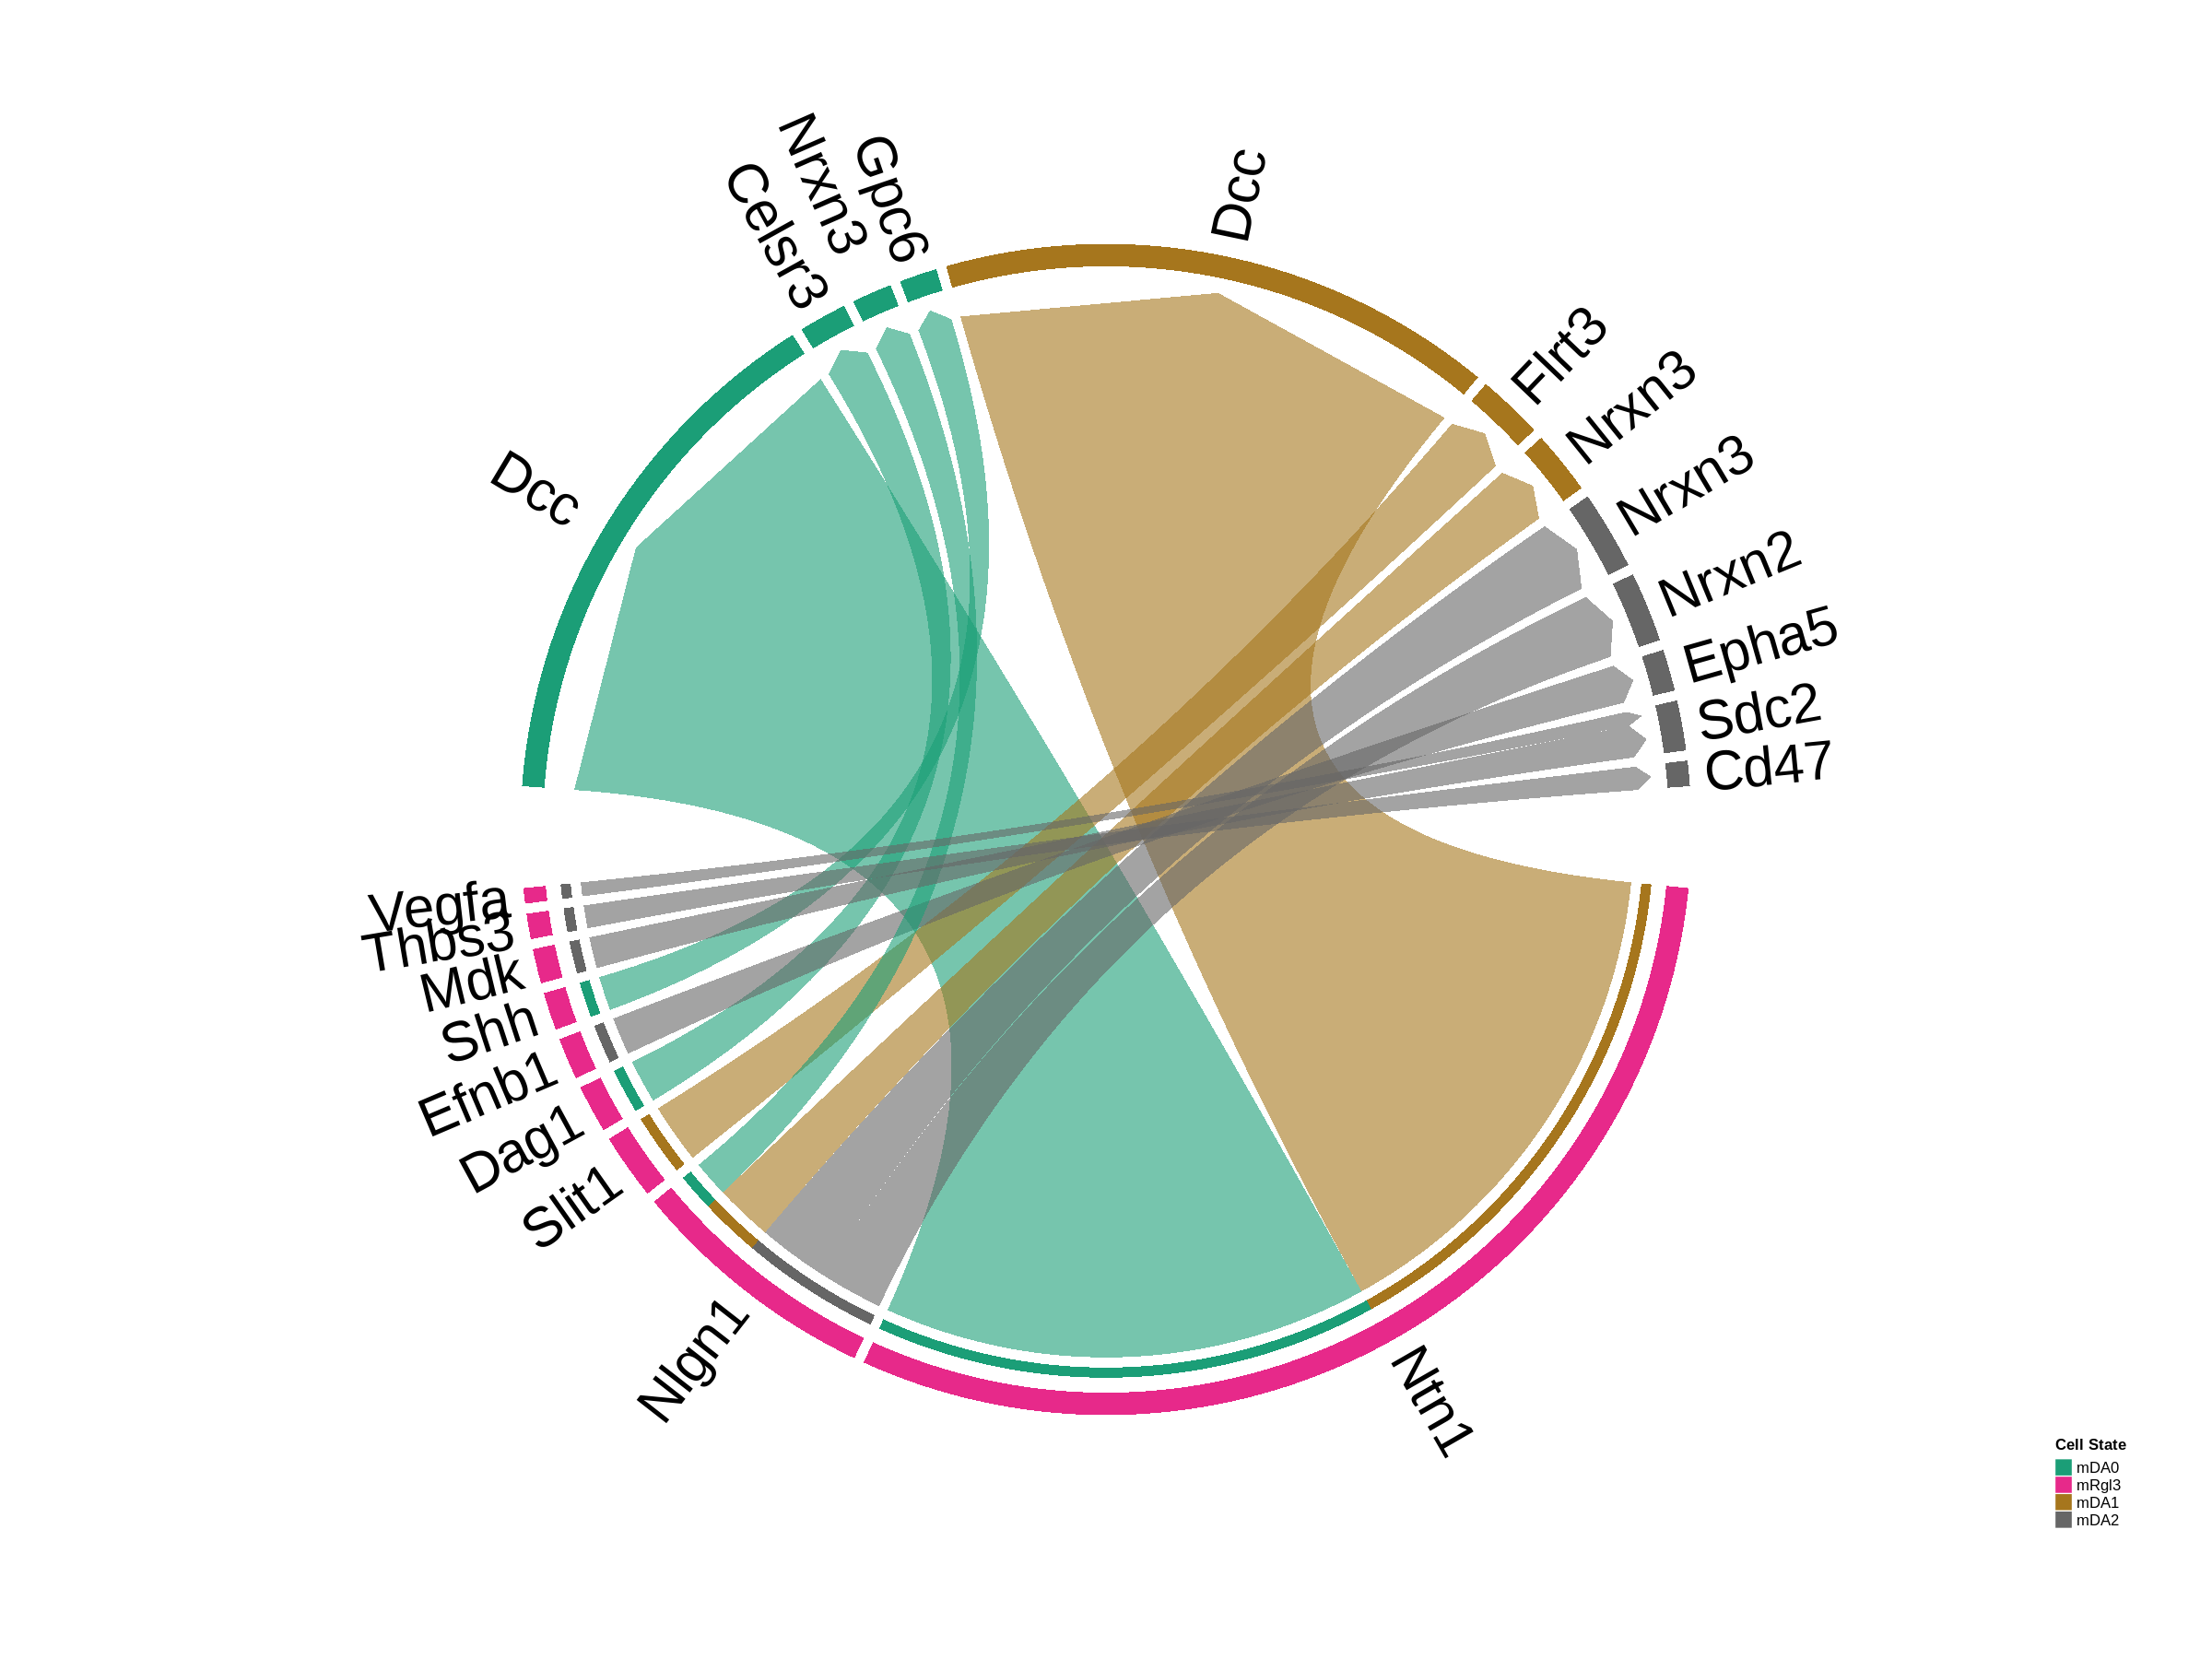

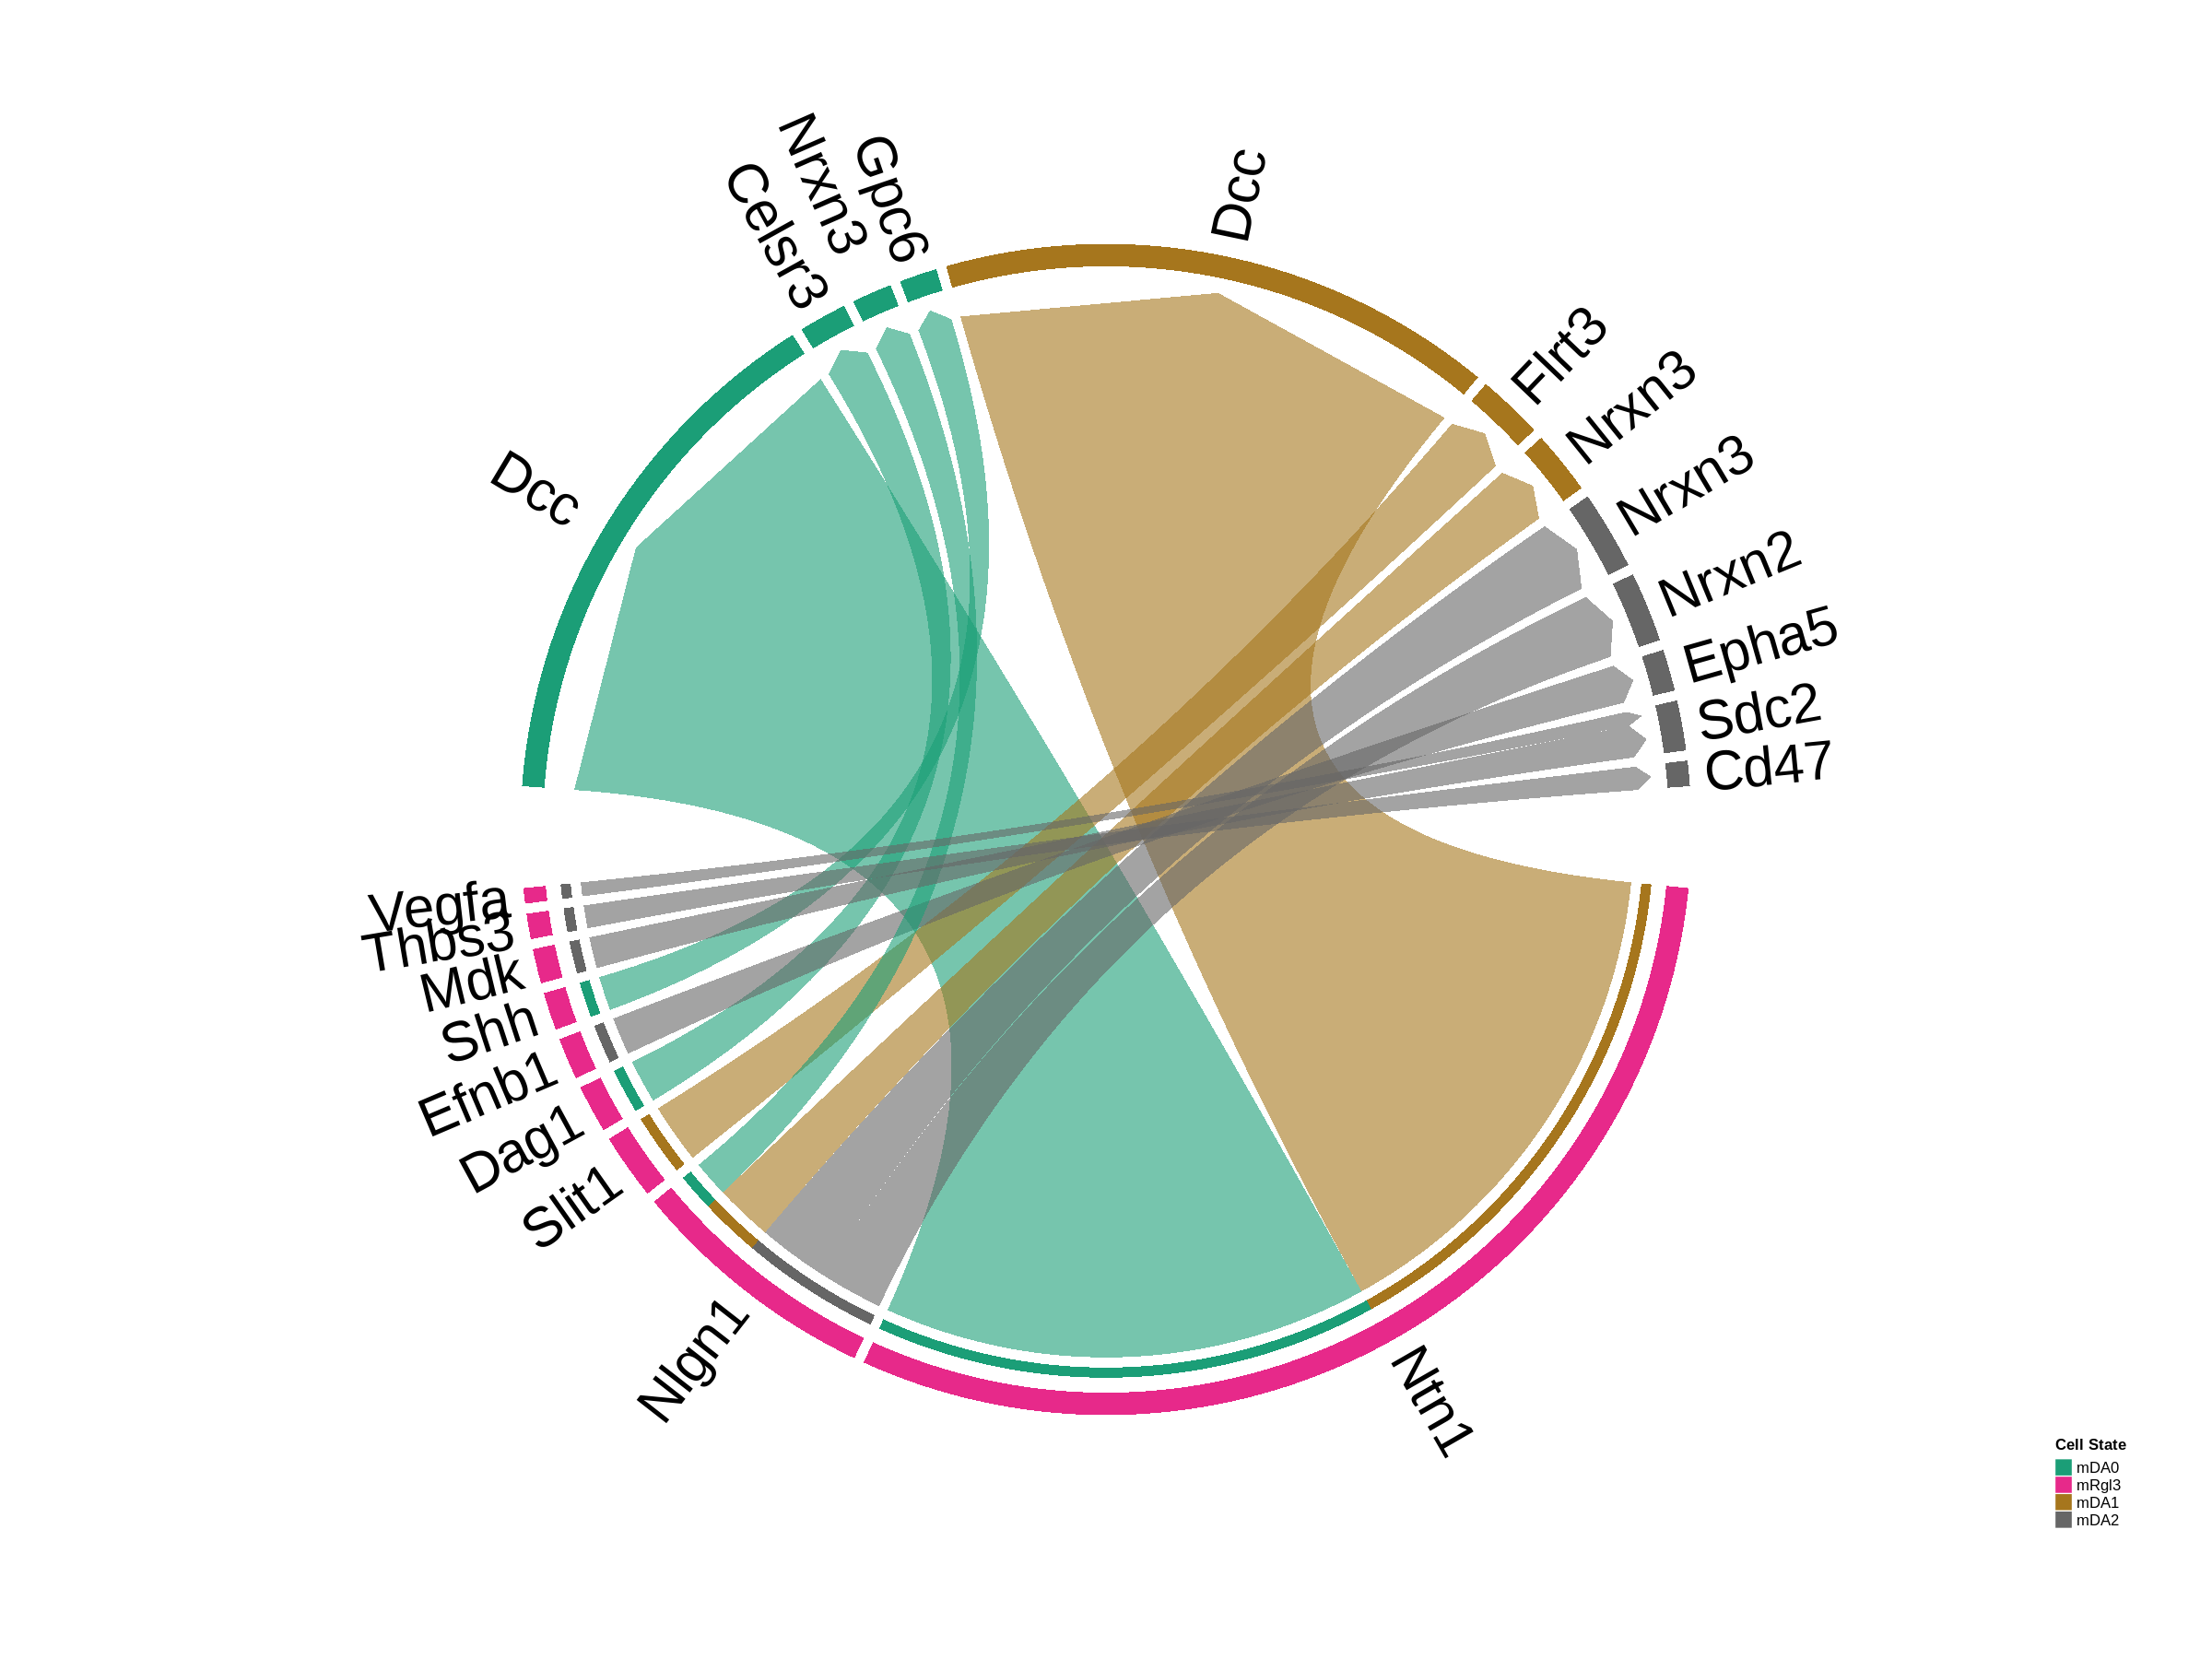

In [56]:
# looking at signaling from Rgl3 to most interesting targets in the dopaminergic niche - subsetting needed for readability
df.net4 = df.net3[df.net3$target %in% c("mDA0", "mDA1", "mDA2"), ]

colors_of_interest <- humouse$color[humouse$mouse %in% c("mRgl3", "mDA0", "mDA1", "mDA2")]
colors.use <- setNames(colors_of_interest, humouse$mouse[humouse$mouse %in% c("mRgl3", "mDA0", "mDA1", "mDA2")])

unique_ligands <- unique(df.net4$ligand)
num_ligands <- length(unique_ligands)

set.seed(123)
ligand_colors <- as.data.frame(sample(colors(), num_ligands))

rownames(ligand_colors) <- unique_ligands

colnames(ligand_colors) = "value"
ligand_colors$ligand <- unique_ligands

df.net4 = dplyr::left_join(df.net4, ligand_colors, by=c("ligand"="ligand"))

head(df.net4)

netVisual_chord_gene_CUSTOM(cellchat, net=df.net4, lab.cex = 3, legend.pos.y = 30, color.use=colors.use)

In [38]:
df.net4 = df.net3[df.net3$target %in% c("mNbDA", "mNbM", "mRgl1"), ]

colors_of_interest <- humouse$color[humouse$mouse %in% c("mRgl3", "mNbDA", "mNbM", "mRgl1")]
colors.use <- setNames(colors_of_interest, humouse$mouse[humouse$mouse %in% c("mRgl3", "mNbDA", "mNbM", "mRgl1")])

unique_ligands <- unique(df.net4$ligand)
num_ligands <- length(unique_ligands)

set.seed(123)
ligand_colors <- as.data.frame(sample(colors(), num_ligands))

rownames(ligand_colors) <- unique_ligands

colnames(ligand_colors) = "value"
ligand_colors$ligand <- unique_ligands

df.net4 = dplyr::left_join(df.net4, ligand_colors, by=c("ligand"="ligand"))

head(df.net4)

netVisual_chord_gene_CUSTOM(cellchat, net=df.net4, lab.cex = 2, legend.pos.y = 30, color.use=colors.use, deg=-0.1)

source target ligand receptor prob       pval interaction_name
1 mRgl3  mNbM   Ntn1   Dcc      0.14402312 0    NTN1_DCC        
2 mRgl3  mNbDA  Ntn1   Dcc      0.11573548 0    NTN1_DCC        
3 mRgl3  mRgl1  Wnt5a  Fzd3     0.07079561 0    WNT5A_FZD3      
4 mRgl3  mRgl1  Wnt5a  Fzd3     0.06845843 0    WNT5A_FZD31     
5 mRgl3  mNbM   Wnt5a  Fzd3     0.05790558 0    WNT5A_FZD3      
6 mRgl3  mNbM   Wnt5a  Fzd3     0.05628915 0    WNT5A_FZD31     
  interaction_name_2 pathway_name annotation        
1 Ntn1_Dcc           NTN1         NA                
2 Ntn1_Dcc           NTN1         NA                
3 Wnt5a  - Fzd3      ncWNT        Secreted Signaling
4 Wnt5a_Fzd3         WNT5A        NA                
5 Wnt5a  - Fzd3      ncWNT        Secreted Signaling
6 Wnt5a_Fzd3         WNT5A        NA                
  evidence                     ligand_expressed receptor_expressed
1 celltalkdb_24876346,11387206 1                1                 
2 celltalkdb_24876346,11387206 1                1                 
3 KEGG: mmu04310               1                1                 
4 celltalkdb_24032637          1                1                 
5 KEGG: mmu04310               1                1                 
6 celltalkdb_24032637          1                1                 
  value               
1 lightgoldenrodyellow
2 lightgoldenrodyellow
3 mediumorchid1       
4 mediumorchid1       
5 mediumorchid1       
6 mediumorchid1

     mNbM     mNbDA     mRgl1     mRgl1      mNbM      mNbM     mRgl1     mRgl1 
"#A6CEE3" "#D95F02" "#7570B3" "#7570B3" "#A6CEE3" "#A6CEE3" "#7570B3" "#7570B3" 
    mRgl1     mRgl1      mNbM     mRgl1     mRgl1     mRgl1     mRgl1     mRgl1 
"#7570B3" "#7570B3" "#A6CEE3" "#7570B3" "#7570B3" "#7570B3" "#7570B3" "#7570B3" 
    mRgl1      mNbM     mNbDA      mNbM      mNbM      mNbM      mNbM     mRgl1 
"#7570B3" "#A6CEE3" "#D95F02" "#A6CEE3" "#A6CEE3" "#A6CEE3" "#A6CEE3" "#7570B3" 
    mRgl1     mRgl1     mRgl1      mNbM     mNbDA     mRgl1     mNbDA     mRgl1 
"#7570B3" "#7570B3" "#7570B3" "#A6CEE3" "#D95F02" "#7570B3" "#D95F02" "#7570B3" 


In [39]:
# save the communication results to file. note, here we got low probabilities of communication overall, but the dataset is quite old and we could still prioritize reasonable targets for further in vitro testing
write.table(communication_filtered, file="communication_filtered_all3databases2.txt", quote=FALSE, sep="\t")